In [151]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt


### Reading and Concatenation of CSV's

In [19]:
# races_files = glob.glob('C:\\Users\\Praveen\\Desktop\\Horse_Race_Prediction\\Races\\races_*.csv')
# horses_files = glob.glob('C:\\Users\\Praveen\\Desktop\\Horse_Race_Prediction\\Horses\\horses_*.csv')
# forward = pd.read_csv('forward.csv')

In [32]:
# races_files[0], horses_files[0]

('C:\\Users\\Praveen\\Desktop\\Horse_Race_Prediction\\Races\\races_1990.csv',
 'C:\\Users\\Praveen\\Desktop\\Horse_Race_Prediction\\Horses\\horses_1990.csv')

In [33]:
# all_races_df = pd.concat([pd.read_csv(file) for file in races_files], ignore_index=True)

In [34]:
# all_horses_df = pd.concat([pd.read_csv(file) for file in horses_files], ignore_index=True)

C:\Users\Praveen\AppData\Local\Temp\ipykernel_14812\1756463012.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  all_horses_df = pd.concat([pd.read_csv(file) for file in horses_files], ignore_index=True)
C:\Users\Praveen\AppData\Local\Temp\ipykernel_14812\1756463012.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  all_horses_df = pd.concat([pd.read_csv(file) for file in horses_files], ignore_index=True)


In [37]:
# all_races_df.to_csv('all_races.csv',index=False)
# all_horses_df.to_csv('all_horses.csv',index=False)

### Data Cleaning and Concatenation

In [152]:
races_df = pd.read_csv('all_races.csv')
horses_df = pd.read_csv('all_horses.csv')
forward_df = pd.read_csv('forward.csv')

C:\Users\Praveen\AppData\Local\Temp\ipykernel_26112\2128942504.py:1: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  races_df = pd.read_csv('all_races.csv')
C:\Users\Praveen\AppData\Local\Temp\ipykernel_26112\2128942504.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  horses_df = pd.read_csv('all_horses.csv')


In [153]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396572 entries, 0 to 396571
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   rid          396572 non-null  int64  
 1   course       396572 non-null  object 
 2   time         396572 non-null  object 
 3   date         396572 non-null  object 
 4   title        396571 non-null  object 
 5   rclass       243580 non-null  object 
 6   band         165263 non-null  object 
 7   ages         383518 non-null  object 
 8   distance     396572 non-null  object 
 9   condition    396524 non-null  object 
 10  hurdles      121619 non-null  object 
 11  prizes       396572 non-null  object 
 12  winningTime  396572 non-null  float64
 13  prize        376864 non-null  float64
 14  metric       396572 non-null  float64
 15  countryCode  396572 non-null  object 
 16  ncond        396572 non-null  object 
 17  class        396572 non-null  int64  
 18  currency     9281 non-nu

In [154]:
horses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107315 entries, 0 to 4107314
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   rid           int64  
 1   horseName     object 
 2   age           float64
 3   saddle        float64
 4   decimalPrice  float64
 5   isFav         int64  
 6   trainerName   object 
 7   jockeyName    object 
 8   position      int64  
 9   positionL     object 
 10  dist          object 
 11  weightSt      int64  
 12  weightLb      int64  
 13  overWeight    float64
 14  outHandicap   float64
 15  headGear      object 
 16  RPR           float64
 17  TR            float64
 18  OR            float64
 19  father        object 
 20  mother        object 
 21  gfather       object 
 22  runners       int64  
 23  margin        float64
 24  weight        int64  
 25  res_win       float64
 26  res_place     float64
 27  price         object 
dtypes: float64(11), int64(7), object(10)
memory usage: 877.4+ MB


In [155]:
races_df['rid']

0         271018
1         275156
2         282203
3         298761
4         301118
           ...  
396567    415086
396568    415087
396569    415088
396570    415089
396571    415090
Name: rid, Length: 396572, dtype: int64

In [156]:
races_df['course']

0                        Exeter
1                 Tramore (IRE)
2                     Catterick
3                    Cheltenham
4                       Windsor
                  ...          
396567            Hanshin (JPN)
396568       Los Alamitos (USA)
396569           Nakayama (JPN)
396570    Tampa Bay Downs (USA)
396571            Trentham (NZ)
Name: course, Length: 396572, dtype: object

In [157]:
races_df['date']

0               90/01/01
1               90/01/01
2               90/01/01
3               90/01/01
4               90/01/01
               ...      
396567    20/12/05 00:00
396568    20/12/05 00:00
396569    20/12/05 00:00
396570    20/12/05 00:00
396571    20/12/05 00:00
Name: date, Length: 396572, dtype: object

In [158]:
races_df['date'] = races_df['date'].str.split(" ").str[0]

In [159]:
races_df['date']

0         90/01/01
1         90/01/01
2         90/01/01
3         90/01/01
4         90/01/01
            ...   
396567    20/12/05
396568    20/12/05
396569    20/12/05
396570    20/12/05
396571    20/12/05
Name: date, Length: 396572, dtype: object

In [160]:
races_df['date'] = pd.to_datetime(races_df['date'], format='%y/%m/%d', errors='coerce')


In [161]:
races_df['date']

0        1990-01-01
1        1990-01-01
2        1990-01-01
3        1990-01-01
4        1990-01-01
            ...    
396567   2020-12-05
396568   2020-12-05
396569   2020-12-05
396570   2020-12-05
396571   2020-12-05
Name: date, Length: 396572, dtype: datetime64[ns]

In [162]:
races_df['year'] = pd.to_datetime(races_df['date']).dt.year
races_df['month'] = pd.to_datetime(races_df['date']).dt.month
races_df['day'] = pd.to_datetime(races_df['date']).dt.day
races_df['day_of_week'] = pd.to_datetime(races_df['date']).dt.dayofweek
races_df['is_weekend'] = races_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Optionally drop the original date column
races_df = races_df.drop(columns=['date'],axis=1)

In [163]:
races_df['time']

0         03:15
1         02:00
2         02:45
3         02:30
4         03:30
          ...  
396567    06:45
396568    10:30
396569    06:25
396570    05:10
396571    03:45
Name: time, Length: 396572, dtype: object

In [164]:
# Function to categorize time
def bin_time(time_obj):
    import datetime
    if time_obj < datetime.time(12, 0):  # Before noon
        return 'Morning'
    elif time_obj < datetime.time(18, 0):  # Before 6 PM
        return 'Afternoon'
    else:  # 6 PM onwards
        return 'Evening'

# Ensure 'time' column is a datetime.time object
races_df['time'] = pd.to_datetime(races_df['time']).dt.time

# Apply binning
races_df['race_time_period'] = races_df['time'].apply(bin_time)

# Encode the new column
races_df['race_time_period'] = races_df['race_time_period'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2})
races_df = races_df.drop(columns=['time'],axis=1)


C:\Users\Praveen\AppData\Local\Temp\ipykernel_26112\3957889743.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  races_df['time'] = pd.to_datetime(races_df['time']).dt.time


In [165]:
races_df['race_time_period']

0         0
1         0
2         0
3         0
4         0
         ..
396567    0
396568    0
396569    0
396570    0
396571    0
Name: race_time_period, Length: 396572, dtype: int64

In [166]:
races_df['title']

0         David Garrett Memorial Challenge Trophy Novice...
1                     Tattersalls Mares E.B.F. Novice Chase
2                              Scotch Corner Handicap Chase
3                                  A. S. W. Handicap Hurdle
4                               Touchen End Handicap Hurdle
                                ...                        
396567                Challenge Cup (Grade 3) (3yo+) (Turf)
396568    Starlet Stakes (Grade 1) (2yo Fillies) (Main T...
396569    Sports Nippon Sho Stayers Stakes (Grade 2) (3y...
396570                    Maiden Claiming Race (2yo) (Turf)
396571    Rydges Wellington Captain Cook Stakes (Group 1...
Name: title, Length: 396572, dtype: object

In [167]:
races_df['band']

0           NaN
1           NaN
2         0-125
3           NaN
4         0-115
          ...  
396567      NaN
396568      NaN
396569      NaN
396570      NaN
396571      NaN
Name: band, Length: 396572, dtype: object

In [168]:
races_df['ages']

0         6-8yo
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
396567     3yo+
396568      2yo
396569     3yo+
396570      2yo
396571     2yo+
Name: ages, Length: 396572, dtype: object

In [169]:
races_df['ages'].value_counts().index

Index(['4yo+', '3yo+', '3yo', '5yo+', '2yo', '4-6yo', '4yo', '6yo+', '4-7yo',
       '3-4yo', '4-5yo', '3-5yo', '5-7yo', '5yo', '2yo+', '5-6yo', '10yo+',
       '6yo', '4-8yo', '2-3yo', '3-6yo', '5-8yo', '6-8yo', '6-7yo', '9yo+',
       '7yo+', '8yo+', '6-9yo'],
      dtype='object', name='ages')

In [170]:
def process_ages(age):
    if isinstance(age, str):  # Ensure the input is a string
        if '+' in age:  # e.g., '4yo+'
            return int(age.split('yo')[0])
        elif '-' in age:  # e.g., '4-6yo'
            lower, upper = map(int, age.replace('yo', '').split('-'))
            return int((lower + upper) / 2)  # Use the average as a representative value
        elif 'yo' in age:  # e.g., '3yo'
            return int(age.split('yo')[0])
    return np.nan  # Return NaN for non-string or unexpected formats

# Apply the function
races_df['ages'] = races_df['ages'].apply(process_ages)

In [171]:
races_df['ages']

0         7.0
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
396567    3.0
396568    2.0
396569    3.0
396570    2.0
396571    2.0
Name: ages, Length: 396572, dtype: float64

In [172]:
races_df['ages'].value_counts()

ages
3.0     153417
4.0     121353
5.0      57468
2.0      46702
6.0       4344
10.0       161
7.0         48
9.0         15
8.0         10
Name: count, dtype: int64

In [173]:
races_df['distance']

0          3m1f
1            2m
2         1m7½f
3            2m
4          2m6f
          ...  
396567     1m2f
396568     1m½f
396569     2m2f
396570       1m
396571       1m
Name: distance, Length: 396572, dtype: object

In [174]:
def convert_distance(distance):
    try:
        # Check for miles and furlongs (e.g., '3m1f')
        if 'm' in distance and 'f' in distance:
            miles, furlongs = distance.split('m')
            furlongs = furlongs.replace('½', '.5').replace('f', '')  # Convert fractions and remove 'f'
            return int(miles) * 8 + float(furlongs)
        elif 'm' in distance:  # Only miles (e.g., '2m')
            miles = distance.replace('m', '')
            return int(miles) * 8
        elif 'f' in distance:  # Only furlongs (e.g., '7f')
            furlongs = distance.replace('f', '').replace('½', '.5')
            return float(furlongs)
        else:
            return np.nan  # Handle unexpected formats
    except Exception as e:
        return np.nan  # Return NaN for any other errors
races_df['distance'] = races_df['distance'].apply(convert_distance)


In [175]:
races_df['distance']

0         25.0
1         16.0
2         15.5
3         16.0
4         22.0
          ... 
396567    10.0
396568     8.5
396569    18.0
396570     8.0
396571     8.0
Name: distance, Length: 396572, dtype: float64

In [176]:
races_df['condition'].value_counts()

condition
Good                103936
Good To Firm         69409
Standard             56992
Soft                 45755
Good To Soft         38286
Heavy                22801
Firm                 17610
Fast                  9578
Yielding              7054
Good To Yielding      5507
Yielding To Soft      5004
Very Soft             4540
Standard To Slow      3573
Soft To Heavy         3562
Slow                   995
Sloppy                 638
Hard                   495
Standard To Fast       373
Muddy                  305
Holding                 65
Frozen                  37
Abandoned                9
Name: count, dtype: int64

In [177]:
races_df['hurdles'].value_counts()

hurdles
8 hurdles                16337
10 hurdles               14976
9 hurdles                13574
12 hurdles                9019
11 hurdles                8704
                         ...  
9 fences 7 omitted           1
-2 hurdles 13 omitted        1
28 fences 2 omitted          1
12 fences 10 omitted         1
9 fences 8 omitted           1
Name: count, Length: 221, dtype: int64

In [178]:
races_df['winningTime'].value_counts()

winningTime
0.00      1449
241.00     199
240.00     195
244.10     187
242.00     186
          ... 
216.32       1
272.01       1
237.83       1
296.68       1
422.26       1
Name: count, Length: 25083, dtype: int64

In [179]:
races_df[['prizes', "prize"]]

,prizes,prize
0,"[2922.5, 875.0, 420.0, 192.5]",4409.0
1,[],NaN
2,"[2238.0, 618.0, 294.0]",3150.0
3,"[5117.0, 1526.0, 728.0, 329.0]",7700.0
4,"[2344.8, 652.8, 314.4]",3312.0
...,...,...
396567,"[287256.19, 111820.64, 69792.46, 43034.64, 284...",540362.0
396568,"[136466.17, 46240.6, 28195.49, 14661.65, 9022.56]",234587.0
396569,"[438217.53, 175775.66, 112181.58, 64551.95, 43...",833763.0
396570,"[6334.59, 2030.08, 1015.04, 609.02, 101.5, 101...",10601.0


since prize is the total of all the values in prizes column, dropping the prizes column

In [180]:
races_df.drop(columns=['prizes'], axis=1, inplace=True)

In [181]:
races_df['metric']

0         5028.0
1         3218.0
2         3116.5
3         3218.0
4         4424.0
           ...  
396567    2011.0
396568    1709.5
396569    3620.0
396570    1609.0
396571    1609.0
Name: metric, Length: 396572, dtype: float64

In [182]:
races_df['countryCode'].value_counts()

countryCode
GB      263644
IE       67344
FR       21560
US       12743
SAF      10990
AU        4297
HK        3624
AE        2444
JP        1686
ARAB      1530
CAN       1366
GER       1357
ARG        770
IT         757
JER        574
BRZ        571
NZ         368
CHI        354
SWE        154
NOR         86
URU         81
TUR         57
SWI         55
GUE         50
DEN         37
SIN         24
SPA         14
CZE         13
KOR          8
KSA          7
BEL          4
MAC          1
PER          1
BHR          1
Name: count, dtype: int64

In [183]:
races_df[['condition','ncond']].value_counts()

condition         ncond
Good              1        56251
                  1        47685
Standard          0        41765
Good To Firm      2        37398
                  2        32011
Soft              5        27154
Good To Soft      10       23108
Soft              5        18601
Heavy             9        15592
Standard          0        15227
Good To Soft      10       15178
Firm              8        10269
Fast              7         8978
Firm              8         7341
Heavy             9         7209
Very Soft         3         4443
Yielding          6         3726
Standard To Slow  13        3422
Yielding          6         3328
Good To Yielding  4         2924
Yielding To Soft  11        2744
Good To Yielding  4         2583
Soft To Heavy     12        2472
Yielding To Soft  11        2260
Soft To Heavy     12        1090
Slow              17         649
Sloppy            15         604
Fast              7          600
Hard              Hard       495
Slow              1

In [184]:
races_df['ncond'].value_counts()

ncond
1       56251
1       47685
0       41789
2       37398
2       32011
5       27154
10      23108
5       18601
9       15592
0       15251
10      15178
8       10269
7        8978
8        7341
9        7209
3        4443
6        3726
13       3422
6        3328
4        2924
11       2744
4        2583
12       2472
11       2260
12       1090
17        649
15        604
7         600
Hard      495
17        346
14        312
16        290
13        151
3          97
14         61
18         61
19         37
15         34
16         15
20          9
18          4
Name: count, dtype: int64

In [185]:
races_df.loc[races_df['ncond'] == 'Hard', 'ncond'] = '21'

In [186]:
races_df['ncond'].unique()

array(['5', '2', '1', '0', '6', '10', '9', '4', '17', '8', '11', '21',
       '7', '12', '3', '18', '15', '16', '13', '14', 5, 0, 1, 4, 11, 2, 7,
       6, 9, 10, 8, 12, 15, 14, 3, 16, 13, 17, 19, 18, 20], dtype=object)

In [187]:
races_df['ncond'] = races_df['ncond'].astype(str)

In [188]:
races_df['ncond']

0         5
1         5
2         2
3         2
4         1
         ..
396567    8
396568    7
396569    1
396570    8
396571    5
Name: ncond, Length: 396572, dtype: object

In [189]:
horses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107315 entries, 0 to 4107314
Data columns (total 28 columns):
 #   Column        Dtype  
---  ------        -----  
 0   rid           int64  
 1   horseName     object 
 2   age           float64
 3   saddle        float64
 4   decimalPrice  float64
 5   isFav         int64  
 6   trainerName   object 
 7   jockeyName    object 
 8   position      int64  
 9   positionL     object 
 10  dist          object 
 11  weightSt      int64  
 12  weightLb      int64  
 13  overWeight    float64
 14  outHandicap   float64
 15  headGear      object 
 16  RPR           float64
 17  TR            float64
 18  OR            float64
 19  father        object 
 20  mother        object 
 21  gfather       object 
 22  runners       int64  
 23  margin        float64
 24  weight        int64  
 25  res_win       float64
 26  res_place     float64
 27  price         object 
dtypes: float64(11), int64(7), object(10)
memory usage: 877.4+ MB


In [190]:
horses_df['rid'].value_counts()

rid
299491    40
328597    40
239445    40
54291     40
159269    40
          ..
40505      2
363097     2
20967      2
365505     2
136572     2
Name: count, Length: 395186, dtype: int64

In [191]:
horses_df['horseName'].unique()

array(['Combermere', 'Royal Battery', 'Just So', ..., "Aimee's Jewel",
       'Times Ticking', 'Awesome Al'], dtype=object)

In [192]:
horses_df['age'].value_counts()

age
 3.0     896962
 4.0     717885
 5.0     624420
 6.0     497271
 2.0     452470
 7.0     355433
 8.0     239400
 9.0     152986
 10.0     89478
 11.0     46881
 12.0     21734
 13.0      8701
 14.0      2374
 15.0       540
 16.0       156
 1.0         51
 17.0        41
-10.0        31
-6.0         27
-1.0         19
-3.0         19
-2.0         19
-4.0         17
-7.0         15
-5.0         14
-9.0         12
 0.0          9
 18.0         8
-11.0         8
-8.0          6
-16.0         5
-17.0         4
-15.0         3
-12.0         3
-14.0         1
 26.0         1
 19.0         1
 27.0         1
Name: count, dtype: int64

In [193]:
invalid_ages = horses_df[horses_df['age'] <= 0]
invalid_ages

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
1118,49804,Merano,-10.0,0.0,0.038462,0,Michael Easterby,Ger Lyons,3,4,...,NaN,Iris Noir,Fanette II,Kedellic,20,1.464665,70,0.0,1.0,NaN
6530,49524,Merano,-10.0,0.0,0.333333,1,Michael Easterby,Lorcan Wyer,6,1,...,NaN,Iris Noir,Fanette II,Kedellic,25,1.590282,72,0.0,0.0,NaN
7042,54038,Leon,-2.0,0.0,0.083333,0,S B Avery,R Bevan,2,1,...,103.0,NaN,NaN,NaN,11,1.164828,73,0.0,1.0,NaN
9011,375614,Merano,-10.0,0.0,0.076923,0,Michael Easterby,R Marley,40,NaN,...,NaN,Iris Noir,Fanette II,Kedellic,21,1.460831,69,0.0,0.0,NaN
9475,357044,Moon Tiger,-3.0,0.0,0.090909,0,D T Hughes,J Collins,2,6,...,NaN,Tigerwood,Moon Haven,Brave Simon,12,1.498160,67,0.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584137,14908,Young At Heart,-7.0,3.0,0.147059,0,Yasuhisa Matsuyama,Shinji Fujita,10,.5,...,NaN,French Deputy,Nifty Heart,Sunday Silence,13,1.261075,57,0.0,0.0,NaN
2629844,36674,Young At Heart,-7.0,NaN,0.039526,0,Yasuhisa Matsuyama,Tetsuzo Sato,14,.75,...,NaN,French Deputy,Nifty Heart,Sunday Silence,18,1.251880,54,0.0,0.0,NaN
2634281,308265,Young At Heart,-7.0,NaN,0.069930,0,Yasuhisa Matsuyama,Hiroki Goto,9,.5,...,NaN,French Deputy,Nifty Heart,Sunday Silence,16,1.260499,57,0.0,0.0,NaN
2659207,303011,Young At Heart,-6.0,NaN,0.108696,0,Yasuhisa Matsuyama,Hiroki Goto,4,1.75,...,NaN,French Deputy,Nifty Heart,Sunday Silence,16,1.254739,55,0.0,1.0,NaN


In [194]:
horses_df = horses_df[horses_df['age'] >0]

In [195]:
horses_df[horses_df['age'] <= 0]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price


In [196]:
horses_df['saddle'].value_counts()

saddle
0.0     551314
2.0     303824
3.0     303770
1.0     303099
4.0     302690
5.0     296343
6.0     283471
7.0     264246
8.0     240019
9.0     211609
10.0    183412
11.0    155255
12.0    130722
13.0    103469
14.0     83401
15.0     60090
16.0     47547
17.0     29863
18.0     22670
19.0     14197
20.0     11362
21.0      6203
22.0      4953
23.0      3539
24.0      2834
25.0      2121
26.0      1515
27.0      1219
28.0      1001
29.0       788
30.0       646
31.0       107
32.0        89
33.0        63
34.0        58
35.0        49
36.0        32
38.0        23
39.0        23
37.0        23
40.0        22
Name: count, dtype: int64

In [197]:
horses_df['decimalPrice'].value_counts()

decimalPrice
0.047619    258357
0.029412    239171
0.058824    231108
0.038462    220629
0.066667    220255
             ...  
0.987654         1
0.947368         1
0.000799         1
0.354839         1
0.243902         1
Name: count, Length: 643, dtype: int64

In [198]:
horses_df['isFav'].value_counts()

isFav
0    3677891
1     428903
Name: count, dtype: int64

In [199]:
horses_df['trainerName'].value_counts()

trainerName
Mark Johnston         30685
Richard Hannon Snr    28053
Richard Fahey         25176
Mick Channon          23803
Tim Easterby          22013
                      ...  
Thomas Trione Jr          1
Larry Eilers              1
Bobby J Needham Jr        1
Andrew Dillon             1
Buddy Lammas              1
Name: count, Length: 18445, dtype: int64

In [200]:
horses_df['jockeyName'].value_counts()

jockeyName
Joe Fanning            21646
Jimmy Quinn            21261
Richard Johnson        20918
Dane O'Neill           18049
Richard Hughes         17685
                       ...  
Miss K Freitag             1
Miss A Batiste             1
Mrs A Luhnenschloss        1
J Limpkins                 1
Hazel Schofer              1
Name: count, Length: 17718, dtype: int64

In [201]:
horses_df['position'].value_counts()

position
1     395801
2     395173
3     393186
4     385076
5     365281
6     336274
7     300632
40    284195
8     261764
9     222560
10    185746
11    148750
12    118534
13     89784
14     67491
15     47415
16     34239
17     22305
18     16135
19     10678
20      7621
21      4826
22      3697
23      2659
24      1937
25      1394
26      1034
27       779
0        570
28       538
29       345
30       184
31        69
32        49
33        32
34        16
35        11
36         6
37         3
38         3
39         2
Name: count, dtype: int64

In [202]:
horses_df['positionL'].unique()

array([nan, '10', '15', '20', 'dist', '2.5', '.75', '12', '3', '5', '1.5',
       '2', 'shd', '4', '.5', 'hd', '1', '7', '6', '30', '8', 'nk', '0.5',
       '0.75', '25', '12.0', '6.0', '15.0', '4.0', '1.0', '2.0', '8.0',
       '3.0', '5.0', '10.0', '20.0', 'dht', '3.5', '1.75', '9', '11',
       '7.0', '25.0', 'snk', '3.25', '3.75', 'nse', '30.0', '1.25',
       '2.25', '2.75', '13', '14', '11.0', '9.0', '14.0', '22', '16',
       '4.5', '17', '15.5', '24', '18', '21', '13.0', '23', '27', '29',
       '26', '19', '28', '5.5', '21.0', '24.0', '17.0', '18.0', '23.0',
       '10.5', '42', '31', '4.75', '4.25', '8.5', '6.75', '6.5', '5.75',
       '7.75', '7.5', '5.25', '8.75', '7.25', '.25', '6.25', '12.25',
       '12.5', '10.75', '15.75', '8.25', '9.25', '18.25', '34', '50',
       '0.25', '36', '32', '41', '39', '48', '38', '40', '9.5', '35',
       '4min', '37', '9.75', '33', '26.0', '44', '43', '45', '46',
       '13.25', '13.5', '19.75', '19.5', '11.25', '47', '49', '11.5',
      

In [203]:
horses_df['dist'].unique()

array([nan, '25.0', '45.0', ..., '225.5', '186', '223.25'], dtype=object)

In [204]:
len(horses_df)

4106794

In [205]:
horses_df['positionL'] = pd.to_numeric(horses_df['positionL'], errors='coerce')
median_value = horses_df['positionL'].median()
horses_df['positionL'] = horses_df['positionL'].fillna(median_value)

In [206]:
horses_df['dist'] = pd.to_numeric(horses_df['dist'], errors='coerce')
median_value = horses_df['dist'].median()
horses_df['dist'] = horses_df['dist'].fillna(median_value)

In [207]:
horses_df[['weightSt','weightLb']]

,weightSt,weightLb
0,11,0
1,11,0
2,10,7
3,11,0
4,11,0
...,...,...
4107310,9,4
4107311,9,0
4107312,9,4
4107313,9,4


In [208]:
horses_df['overWeight'].unique()

array([nan,  1.,  3.,  6.,  2.,  8.,  5.,  4.,  9.,  7., 12., 22., 11.,
       17., 10., 27., 15., 14., 25., 13., 23., 34., 19., 16., 18., 21.,
       20., 26., 24., 60., 30., 42., 28., 38., 31., 29., 33.])

In [209]:
horses_df['outHandicap'].unique()

array([ nan,   2.,  21.,   3.,  25.,  17.,   8.,  10.,   1.,   5.,  14.,
        24.,   7.,  11.,  23.,  15.,  33.,   6.,  34.,  26.,  19.,  13.,
        16.,  20.,  18.,  12.,  28.,   9.,   4.,  38.,  29.,  27.,  35.,
        60.,  65.,  22.,  30.,  36.,  44.,  46.,  32.,  31.,  39.,  37.,
        48.,  53.,  42.,  -5.,  -2.,  -6.,  -4.,  64.,  -3.,  40.,  47.,
        41.,  45.,  43.,  58.,  -8.,  -1.,  51.,  49.,  50.,  56.,  55.,
        52.,  68.,  80.,  83., 135., 138., 115.,  54., 106., 107.,  99.,
        72.,  57., 112.,  63., 118.,  66.,  73.,  61.])

In [210]:
horses_df['headGear'].unique()

array([nan, 'b', 'v', 'hv', 'hb', 'e/s', 'h', 'e', 'eb', 'hc', 'he',
       'ecv', 'cv', 't', 'tb', 'tv', 'et', 'etb', 'hetb', 'hecv', 'ev',
       'htb', 'ht', 'p', 'tp', 'hp', 'ec', 'bp', 'vp', 'e/sp', 'htv',
       'tbp', 'het', 'htp', 'heb', 'etp', 'hetp', 'hep', 'tvp', 'hct',
       'hev'], dtype=object)

In [211]:
horses_df['RPR'].unique()

array([111., 101.,  86.,  66.,  nan, 135., 109., 152., 141., 117.,  97.,
       100., 103., 105.,  88.,  98.,  91.,  99.,  96.,  84.,  81.,  78.,
        74.,  89.,  73.,  61.,  57.,  64.,  50.,  48.,  67., 112.,  56.,
        44., 149., 142., 139., 106., 108.,  77., 102.,  79.,  72.,  63.,
        75.,  93., 113., 115., 118.,  85.,  83.,  69., 110.,  71.,  65.,
        46.,  55.,  59.,  47.,  95.,  76.,  80., 104.,  60.,  36.,  41.,
        49.,  70., 123.,  43.,  58.,  35.,  32., 116.,  94., 125., 126.,
       137., 129.,  90.,  87., 140., 148.,  92., 136., 121., 107., 122.,
       119.,  82., 163.,  51.,  53.,  39., 134., 124., 114.,  42.,  52.,
        54.,  34.,  68.,  19.,  28.,  29.,  37.,  45.,  25.,  62., 146.,
       131., 127., 120.,  33., 128., 130., 143., 133., 154., 138.,  40.,
        18.,   1.,  38.,  15.,  30., 158., 153., 150.,  26.,  31., 132.,
        22.,  21., 160., 162., 169., 144., 151.,  24., 159., 145.,  17.,
        20.,  14.,   7.,   9.,  27.,   8.,  13.,  1

In [212]:
horses_df['TR'].unique()

array([ 94.,  88.,  71.,  65.,  45.,  41.,  nan, 102.,  74.,  77., 118.,
       108.,  84.,  76.,  60.,  80.,  81.,  87.,  72.,  70.,  78., 104.,
        83.,  79.,  67.,  54.,  46.,  58.,  36.,  49.,  35.,  32.,  48.,
       132., 125., 122.,  82.,  61.,  53.,  56.,  52.,  66.,  39.,  38.,
        30.,  69.,  55.,  50.,  37.,  86.,  93.,  98.,  75.,  62., 105.,
        96.,  59.,  34.,  27., 106.,  68.,  47.,  63.,  44.,  95.,  43.,
        57.,  40.,  17.,  26.,  28.,  15.,  14., 127., 119., 107.,  33.,
        29.,  22.,  16.,  13.,  85.,  64.,  24.,   6.,  99.,  73.,  19.,
        11.,  42.,   8.,  12.,   5.,  91.,  51.,  90., 110.,  92.,  20.,
        21.,  31.,   9.,  18.,  23.,   4.,   3.,  25.,   7.,  10.,   1.,
       100., 114., 101., 103., 109., 133., 113., 142.,  97.,  89., 111.,
       120., 112., 140., 152., 126., 116.,   2., 130., 117., 128., 135.,
       121., 115., 131., 156., 123., 124., 143., 148., 146., 138., 164.,
       150., 155., 145., 141., 136., 137., 165., 16

In [213]:
horses_df['OR'].unique()

array([ nan, 129., 108., 111., 149., 140., 131., 128., 121.,  90.,  96.,
       102., 106.,  89., 103., 105., 104., 110., 113.,  83.,  86.,  99.,
        88., 100., 109.,  93.,  87.,  98.,  92.,  85.,  78.,  97.,  80.,
        82.,  75., 107., 118., 123., 101., 116.,  94., 119., 126.,  57.,
        35.,  41.,  54.,  39.,  33.,  49.,  40.,  70.,  71.,  69.,  68.,
        74., 112., 115.,  48.,  63., 133., 120., 122., 137., 136., 145.,
       138., 142., 134., 135., 127., 143.,  67.,  84., 147., 148., 139.,
        79., 124.,  53.,  46.,  38.,  32.,  43.,  56.,  65.,  42.,  51.,
        47.,  34.,  45.,  61.,  50.,  62.,  55.,  95., 117.,  91., 132.,
       125.,  30.,  64.,  60.,  37.,  31.,  66.,  44.,  73.,  76.,  81.,
        72.,  77., 155., 161., 141., 144., 150.,  52.,  58., 114.,  59.,
        36.,  27., 154., 153., 156., 159., 172., 157., 130.,  28.,  25.,
       152., 169., 160.,  24., 162., 146., 151.,  29., 171., 185., 164.,
        26.,  22., 166., 165.,  23.,  20.,  18., 16

In [214]:
horses_df['father'].unique()

array(['Absalom', 'Norfolk Air', 'Sousa', ..., 'Come On Jazz',
       'Vanishing Cupid', 'Libano'], dtype=object)

In [215]:
horses_df['mother'].unique()

array(["Queen's Parade", 'All At Sea', 'Just Camilla', ...,
       'Morethanbeautiful', 'Arana', 'Laoghaire'], dtype=object)

In [216]:
horses_df['gfather'].unique()

array(['Sovereign Path', 'Man The Rail', 'Ascertain I', ..., 'Overdriven',
       'Malhub', 'Som Alco'], dtype=object)

In [217]:
horses_df['runners'].unique()

array([14, 10,  3,  5, 13, 23, 18,  4,  6, 12,  9,  8, 16, 11, 15, 17,  7,
        2, 21, 20, 22, 19, 25, 27, 24, 29, 28, 30, 38, 26, 32, 40, 31, 33,
       35, 36, 39, 37, 34], dtype=int64)

In [218]:
horses_df['margin'].unique()

array([1.52100334, 1.45925054, 1.08333333, ..., 1.25799795, 1.20985462,
       1.19159145])

In [219]:
horses_df['weight'].value_counts()

weight
58     407088
57     393892
55     286772
53     260795
54     245293
68     215740
56     214841
59     187653
69     166745
73     164086
60     137864
70     133585
71     125775
63     117429
72     113546
67     105636
52     101240
66      99809
61      80084
65      71218
75      71054
62      65320
64      61481
51      58183
74      57218
50      42538
76      33392
49      31982
48      27383
47      11894
46       6268
45       4386
77       2499
78       1748
44       1621
79        575
43         64
80         39
0          24
81         13
82          9
83          2
4           1
25          1
85          1
84          1
132         1
95          1
39          1
3           1
102         1
105         1
Name: count, dtype: int64

In [220]:
def clean_weights(weight):
    if weight <= 30 or weight > 90:
        return np.nan
    return weight

horses_df['weight'] = horses_df['weight'].apply(clean_weights)


In [221]:
horses_df[['res_win','res_place']]

,res_win,res_place
0,1.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
4107310,0.0,0.0
4107311,0.0,0.0
4107312,0.0,0.0
4107313,0.0,0.0


In [222]:
horses_df['price'].value_counts()

price
12/1      3392
14/1      3347
16/1      3174
10/1      2869
33/1      2802
          ... 
123/20       1
254/1        1
236/1        1
240/1        1
296/1        1
Name: count, Length: 578, dtype: int64

In [223]:
races_df_numerical = races_df.select_dtypes(include=np.number).columns
races_df_categorical = races_df.select_dtypes(exclude=np.number).columns

horses_df_numerical = horses_df.select_dtypes(include=np.number).columns
horses_df_categorical = horses_df.select_dtypes(exclude=np.number).columns

In [224]:
print("Races-->")
for col in races_df_numerical:
    if races_df[col].isnull().sum() > 0:
        print(col,':', round(((races_df[col].isnull().sum()/len(races_df[col])) * 100),2), '%')
print('\n')
print("Horses-->")
for col in horses_df_numerical:
    if horses_df[col].isnull().sum() > 0:
        print(col,':', round(((horses_df[col].isnull().sum()/len(horses_df[col])) * 100),2), '%')

Races-->
ages : 3.29 %
prize : 4.97 %


Horses-->
saddle : 4.36 %
overWeight : 97.7 %
outHandicap : 97.25 %
RPR : 21.05 %
TR : 40.94 %
OR : 43.7 %
weight : 0.0 %


In [225]:
races_df[races_df['ages'].isnull()]

,rid,course,title,rclass,band,ages,distance,condition,hurdles,winningTime,...,countryCode,ncond,class,currency,year,month,day,day_of_week,is_weekend,race_time_period
1,275156,Tramore (IRE),Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,NaN,16.0,Soft,12 fences,267.00,...,IE,5,0,NaN,1990,1,1,0,0,0
2,282203,Catterick,Scotch Corner Handicap Chase,NaN,0-125,NaN,15.5,Good To Firm,12 fences,238.00,...,GB,2,0,NaN,1990,1,1,0,0,0
3,298761,Cheltenham,A. S. W. Handicap Hurdle,NaN,NaN,NaN,16.0,Good To Firm,NaN,243.80,...,GB,2,0,NaN,1990,1,1,0,0,0
4,301118,Windsor,Touchen End Handicap Hurdle,NaN,0-115,NaN,22.0,Good,NaN,330.70,...,GB,1,0,NaN,1990,1,1,0,0,0
5,305074,Leicester,Humberstone Novices' Hurdle,NaN,NaN,NaN,16.0,Good,8 hurdles,226.60,...,GB,1,0,NaN,1990,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282452,361477,Trentham (NZ),Hiremaster Cuddle Stakes (Group 3) (Fillies &a...,NaN,NaN,NaN,8.0,Good,NaN,95.72,...,NZ,1,0,NaN,2014,3,15,5,1,0
284047,100740,Hastings (NZ),Windsor Park Hawke's Bay Gold Cup (Group 3 Han...,NaN,NaN,NaN,11.0,Heavy,NaN,147.20,...,NZ,9,0,NaN,2014,4,19,5,1,0
284829,295766,Gold Coast (AUS),Wimmers A D Hollindale Stakes (Group 2),NaN,NaN,NaN,9.0,Heavy,NaN,113.17,...,AU,9,0,NaN,2014,5,3,5,1,0
304038,146626,Baden-Baden (GER),Badener Roulette Preis (Turf),NaN,NaN,NaN,10.0,Good,NaN,125.63,...,GER,1,0,NaN,2015,6,7,6,1,0


In [226]:
races_df[races_df['prize'].isnull()]

,rid,course,title,rclass,band,ages,distance,condition,hurdles,winningTime,...,countryCode,ncond,class,currency,year,month,day,day_of_week,is_weekend,race_time_period
1,275156,Tramore (IRE),Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,NaN,16.0,Soft,12 fences,267.00,...,IE,5,0,NaN,1990,1,1,0,0,0
11,350951,Fairyhouse (IRE),G.V. Malcomson Memorial E.B.F. Chase (Listed R...,NaN,NaN,NaN,18.0,Yielding,15 fences,283.90,...,IE,6,0,NaN,1990,1,1,0,0,0
13,385114,Fairyhouse (IRE),Father Time Handicap Chase,NaN,NaN,NaN,24.0,Yielding,15 fences,360.39,...,IE,6,0,NaN,1990,1,1,0,0,0
23,246672,Fairyhouse (IRE),New Year Maiden Hurdle,NaN,NaN,NaN,16.0,Yielding,10 hurdles,232.20,...,IE,6,0,NaN,1990,1,1,0,0,0
24,249578,Tramore (IRE),Kilfarassy Maiden Hurdle,NaN,NaN,5.0,16.0,Soft,10 hurdles,260.20,...,IE,5,0,NaN,1990,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325446,117898,Newmarket,Newmarket Challenge Whip (A Handicap),Class 6,0-85,3.0,10.0,Good To Firm,NaN,127.27,...,GB,2,6,NaN,2016,9,22,3,0,0
342713,122406,Newmarket,Newmarket Challenge Whip Handicap,Class 4,0-85,3.0,10.0,Good To Soft,NaN,129.28,...,GB,10,4,NaN,2017,9,28,3,0,0
359948,34289,Newmarket,Newmarket Challenge Whip Handicap,Class 4,0-85,3.0,10.0,Good,NaN,124.75,...,GB,1,4,NaN,2018,9,27,3,0,0
367782,118533,Meydan (uae) (ARAB),Dubai Kahayla Classic Sponsored By Mubadala (G...,NaN,NaN,4.0,10.0,Fast,NaN,135.67,...,ARAB,7,0,NaN,2019,3,30,5,1,0


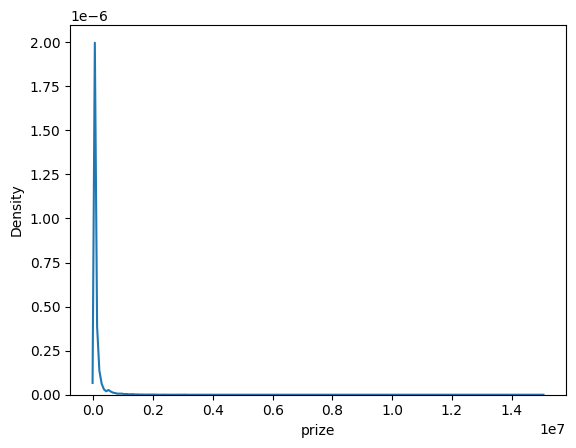

In [227]:
sns.kdeplot(races_df['prize'])
plt.show()


In [228]:
for col in races_df_numerical:
    if races_df[col].isnull().sum() > 0:
        races_df[col] = races_df[col].fillna(races_df[col].median())

In [229]:
# for col in horses_df_numerical:
#     if horses_df[col].isnull().sum() > 0:
#         print(col,':', sns.kdeplot(horses_df[col]))
#         plt.show()

In [230]:
horses_df[horses_df['OR'].isnull()]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
0,271018,Combermere,6.0,0.0,0.222222,0,R G Frost,J Frost,1,2.50,...,NaN,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69.0,1.0,1.0,NaN
1,271018,Royal Battery,6.0,0.0,0.090909,0,D H Barons,S Earle,2,10.00,...,NaN,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69.0,0.0,1.0,NaN
2,271018,Just So,7.0,0.0,0.029412,0,J D Roberts,S Burrough,3,15.00,...,NaN,Sousa,Just Camilla,Ascertain I,14,1.521003,66.0,0.0,1.0,NaN
3,271018,Mandraki Shuffle,8.0,0.0,0.090909,0,Oliver Sherwood,M Richards,4,20.00,...,NaN,Mandalus,Indictment,Desert Call,14,1.521003,69.0,0.0,0.0,NaN
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,2.50,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Beefeater,8.0,6.0,0.030303,0,Roydon Bergerson,Hazel Schofer,7,2.50,...,NaN,Alamosa,Karaka,Kings Island II,11,1.191591,58.0,0.0,0.0,32/1
4107311,415090,Aimee's Jewel,4.0,11.0,0.153846,0,Trudy Keegan,Lisa Allpress,8,0.50,...,NaN,Proisir,Aimee's Idol,Colombia,11,1.191591,57.0,0.0,0.0,11/2
4107312,415090,Times Ticking,5.0,8.0,0.044053,0,Alby Macgregor,Jonathan Riddell,9,2.50,...,NaN,Tavistock,Laoghaire,Pins,11,1.191591,58.0,0.0,0.0,217/10
4107313,415090,Shadows Cast,8.0,3.0,0.041152,0,Mark Oulaghan,Johnathan Parkes,10,1.00,...,NaN,Per Incanto,Ages Past,Slavic,11,1.191591,58.0,0.0,0.0,233/10


In [231]:
horses_df[horses_df['TR'].isnull()]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
6,271018,Hi' Upham,8.0,0.0,0.058824,0,D R Gandolfo,S McNeill,40,2.50,...,NaN,Deep Run,Highly Acceptable,Immortality I,14,1.521003,67.0,0.0,0.0,NaN
7,271018,Lauderdale Lad,8.0,0.0,0.200000,0,J S King,B Powell Snr,40,2.50,...,NaN,Politico,Cannes Beach,Canadel II,14,1.521003,72.0,0.0,0.0,NaN
8,271018,Providence Lodge,8.0,0.0,0.125000,0,F Walwyn,R Chapman,40,2.50,...,NaN,The Parson,Pallatess,Pall Mall,14,1.521003,67.0,0.0,0.0,NaN
9,271018,Duke Of Abson,5.0,0.0,0.038462,0,D H Barons,Carl Llewellyn,40,2.50,...,NaN,Lakenheath I,Moon Goddess,Greek God,14,1.521003,69.0,0.0,0.0,NaN
10,271018,Valassy,7.0,0.0,0.500000,1,J A C Edwards,D Tegg,40,2.50,...,NaN,Northern Value,Plum Sassy,Prince Tenderfoot,14,1.521003,72.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Beefeater,8.0,6.0,0.030303,0,Roydon Bergerson,Hazel Schofer,7,2.50,...,NaN,Alamosa,Karaka,Kings Island II,11,1.191591,58.0,0.0,0.0,32/1
4107311,415090,Aimee's Jewel,4.0,11.0,0.153846,0,Trudy Keegan,Lisa Allpress,8,0.50,...,NaN,Proisir,Aimee's Idol,Colombia,11,1.191591,57.0,0.0,0.0,11/2
4107312,415090,Times Ticking,5.0,8.0,0.044053,0,Alby Macgregor,Jonathan Riddell,9,2.50,...,NaN,Tavistock,Laoghaire,Pins,11,1.191591,58.0,0.0,0.0,217/10
4107313,415090,Shadows Cast,8.0,3.0,0.041152,0,Mark Oulaghan,Johnathan Parkes,10,1.00,...,NaN,Per Incanto,Ages Past,Slavic,11,1.191591,58.0,0.0,0.0,233/10


In [232]:
horses_df[horses_df['RPR'].isnull()]

,rid,horseName,age,saddle,decimalPrice,isFav,trainerName,jockeyName,position,positionL,...,OR,father,mother,gfather,runners,margin,weight,res_win,res_place,price
4,271018,Turnberry Dawn,8.0,0.0,0.047619,0,T B Hallett,P Richards,5,2.50,...,NaN,Fair Turn,Shuil Alainn,Levanter,14,1.521003,69.0,0.0,0.0,NaN
5,271018,Yreka Bay,8.0,0.0,0.029412,0,J A C Edwards,W Irvine,6,2.50,...,NaN,Le Bavard,Maureens Dote,David Jack,14,1.521003,68.0,0.0,0.0,NaN
6,271018,Hi' Upham,8.0,0.0,0.058824,0,D R Gandolfo,S McNeill,40,2.50,...,NaN,Deep Run,Highly Acceptable,Immortality I,14,1.521003,67.0,0.0,0.0,NaN
7,271018,Lauderdale Lad,8.0,0.0,0.200000,0,J S King,B Powell Snr,40,2.50,...,NaN,Politico,Cannes Beach,Canadel II,14,1.521003,72.0,0.0,0.0,NaN
8,271018,Providence Lodge,8.0,0.0,0.125000,0,F Walwyn,R Chapman,40,2.50,...,NaN,The Parson,Pallatess,Pall Mall,14,1.521003,67.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4107310,415090,Beefeater,8.0,6.0,0.030303,0,Roydon Bergerson,Hazel Schofer,7,2.50,...,NaN,Alamosa,Karaka,Kings Island II,11,1.191591,58.0,0.0,0.0,32/1
4107311,415090,Aimee's Jewel,4.0,11.0,0.153846,0,Trudy Keegan,Lisa Allpress,8,0.50,...,NaN,Proisir,Aimee's Idol,Colombia,11,1.191591,57.0,0.0,0.0,11/2
4107312,415090,Times Ticking,5.0,8.0,0.044053,0,Alby Macgregor,Jonathan Riddell,9,2.50,...,NaN,Tavistock,Laoghaire,Pins,11,1.191591,58.0,0.0,0.0,217/10
4107313,415090,Shadows Cast,8.0,3.0,0.041152,0,Mark Oulaghan,Johnathan Parkes,10,1.00,...,NaN,Per Incanto,Ages Past,Slavic,11,1.191591,58.0,0.0,0.0,233/10


In [233]:
# Since overWeight : 97.7 % and outHandicap : 97.24% null values, dropping those columns

horses_df.drop(columns=['overWeight','outHandicap'],axis=1,inplace=True)
horses_df_numerical = horses_df_numerical.drop(['overWeight','outHandicap'])

In [234]:
for col in horses_df_numerical:
    if horses_df[col].isnull().sum() > 0:
        horses_df[col] = horses_df[col].fillna(horses_df[col].median())

In [235]:
print("Races-->")
for col in races_df_numerical:
    if races_df[col].isnull().sum() > 0:
        print(col,':', round(((races_df[col].isnull().sum()/len(races_df[col])) * 100),2), '%')
print("No Null Values in Races")
print('\n')

print("Horses-->")
for col in horses_df_numerical:
    if horses_df[col].isnull().sum() > 0:
        print(col,':', round(((horses_df[col].isnull().sum()/len(horses_df[col])) * 100),2), '%')
print("No Null Values in Horses")


Races-->
No Null Values in Races


Horses-->
No Null Values in Horses


In [236]:
print("Races-->")
for col in races_df_categorical:
    if races_df[col].isnull().sum() > 0:
        print(col,':', round(((races_df[col].isnull().sum()/len(races_df[col])) * 100),4), '%')
print('\n')

print("Horses-->")
for col in horses_df_categorical:
    if horses_df[col].isnull().sum() > 0:
        print(col,':', round(((horses_df[col].isnull().sum()/len(horses_df[col])) * 100),4), '%')

Races-->
title : 0.0003 %
rclass : 38.5786 %
band : 58.3271 %
condition : 0.0121 %
hurdles : 69.3324 %
currency : 97.6597 %


Horses-->
trainerName : 0.0637 %
jockeyName : 0.003 %
headGear : 75.9524 %
father : 0.0258 %
mother : 0.1021 %
gfather : 2.8997 %
price : 97.6865 %


In [237]:
races_df[races_df['class']==1]['rclass'].value_counts()

rclass
Class 1    11649
Name: count, dtype: int64

In [238]:
races_df[races_df['class'] == 0]

,rid,course,title,rclass,band,ages,distance,condition,hurdles,winningTime,...,countryCode,ncond,class,currency,year,month,day,day_of_week,is_weekend,race_time_period
0,271018,Exeter,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,7.0,25.0,Soft,19 fences,398.30,...,GB,5,0,NaN,1990,1,1,0,0,0
1,275156,Tramore (IRE),Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,3.0,16.0,Soft,12 fences,267.00,...,IE,5,0,NaN,1990,1,1,0,0,0
2,282203,Catterick,Scotch Corner Handicap Chase,NaN,0-125,3.0,15.5,Good To Firm,12 fences,238.00,...,GB,2,0,NaN,1990,1,1,0,0,0
3,298761,Cheltenham,A. S. W. Handicap Hurdle,NaN,NaN,3.0,16.0,Good To Firm,NaN,243.80,...,GB,2,0,NaN,1990,1,1,0,0,0
4,301118,Windsor,Touchen End Handicap Hurdle,NaN,0-115,3.0,22.0,Good,NaN,330.70,...,GB,1,0,NaN,1990,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396567,415086,Hanshin (JPN),Challenge Cup (Grade 3) (3yo+) (Turf),NaN,NaN,3.0,10.0,Firm,NaN,119.90,...,JP,8,0,GBP,2020,12,5,5,1,0
396568,415087,Los Alamitos (USA),Starlet Stakes (Grade 1) (2yo Fillies) (Main T...,NaN,NaN,2.0,8.5,Fast,NaN,104.53,...,US,7,0,GBP,2020,12,5,5,1,0
396569,415088,Nakayama (JPN),Sports Nippon Sho Stayers Stakes (Grade 2) (3y...,NaN,NaN,3.0,18.0,Good,NaN,232.00,...,JP,1,0,GBP,2020,12,5,5,1,0
396570,415089,Tampa Bay Downs (USA),Maiden Claiming Race (2yo) (Turf),NaN,NaN,2.0,8.0,Firm,NaN,99.34,...,US,8,0,GBP,2020,12,5,5,1,0


In [239]:
races_df[races_df['rclass'].isnull()]

,rid,course,title,rclass,band,ages,distance,condition,hurdles,winningTime,...,countryCode,ncond,class,currency,year,month,day,day_of_week,is_weekend,race_time_period
0,271018,Exeter,David Garrett Memorial Challenge Trophy Novice...,NaN,NaN,7.0,25.0,Soft,19 fences,398.30,...,GB,5,0,NaN,1990,1,1,0,0,0
1,275156,Tramore (IRE),Tattersalls Mares E.B.F. Novice Chase,NaN,NaN,3.0,16.0,Soft,12 fences,267.00,...,IE,5,0,NaN,1990,1,1,0,0,0
2,282203,Catterick,Scotch Corner Handicap Chase,NaN,0-125,3.0,15.5,Good To Firm,12 fences,238.00,...,GB,2,0,NaN,1990,1,1,0,0,0
3,298761,Cheltenham,A. S. W. Handicap Hurdle,NaN,NaN,3.0,16.0,Good To Firm,NaN,243.80,...,GB,2,0,NaN,1990,1,1,0,0,0
4,301118,Windsor,Touchen End Handicap Hurdle,NaN,0-115,3.0,22.0,Good,NaN,330.70,...,GB,1,0,NaN,1990,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396567,415086,Hanshin (JPN),Challenge Cup (Grade 3) (3yo+) (Turf),NaN,NaN,3.0,10.0,Firm,NaN,119.90,...,JP,8,0,GBP,2020,12,5,5,1,0
396568,415087,Los Alamitos (USA),Starlet Stakes (Grade 1) (2yo Fillies) (Main T...,NaN,NaN,2.0,8.5,Fast,NaN,104.53,...,US,7,0,GBP,2020,12,5,5,1,0
396569,415088,Nakayama (JPN),Sports Nippon Sho Stayers Stakes (Grade 2) (3y...,NaN,NaN,3.0,18.0,Good,NaN,232.00,...,JP,1,0,GBP,2020,12,5,5,1,0
396570,415089,Tampa Bay Downs (USA),Maiden Claiming Race (2yo) (Turf),NaN,NaN,2.0,8.0,Firm,NaN,99.34,...,US,8,0,GBP,2020,12,5,5,1,0


In [240]:
races_df['rclass'] = races_df['rclass'].fillna('Class 0')

In [241]:
# Dropping the cols with more than 50% Null values from Races and Horses:
races_df.drop(columns=['band','hurdles','currency'],axis=1,inplace=True)
races_df_categorical = races_df_categorical.drop(['band','hurdles','currency'])

horses_df.drop(columns=['headGear','price'],axis=1,inplace=True)
horses_df_categorical = horses_df_categorical.drop(['headGear','price'])

In [242]:
print("Races-->")
for col in races_df_categorical:
    if races_df[col].isnull().sum() > 0:
        print(col,':', round(((races_df[col].isnull().sum()/len(races_df[col])) * 100),4), '%')
print('\n')

print("Horses-->")
for col in horses_df_categorical:
    if horses_df[col].isnull().sum() > 0:
        print(col,':', round(((horses_df[col].isnull().sum()/len(horses_df[col])) * 100),4), '%')

Races-->
title : 0.0003 %
condition : 0.0121 %


Horses-->
trainerName : 0.0637 %
jockeyName : 0.003 %
father : 0.0258 %
mother : 0.1021 %
gfather : 2.8997 %


In [243]:
for col in races_df_categorical:
    if races_df[col].isnull().sum() > 0:
        races_df[col] = races_df[col].fillna(races_df[col].mode()[0])

In [244]:
for col in horses_df_categorical:
    if horses_df[col].isnull().sum() > 0:
        horses_df[col] = horses_df[col].fillna(horses_df[col].mode()[0])

In [245]:
print("Races-->")
for col in races_df_categorical:
    if races_df[col].isnull().sum() > 0:
        print(col,':', round(((races_df[col].isnull().sum()/len(races_df[col])) * 100),4), '%')
print('No Null Values in Races')

print("Horses-->")
for col in horses_df_categorical:
    if horses_df[col].isnull().sum() > 0:
        print(col,':', round(((horses_df[col].isnull().sum()/len(horses_df[col])) * 100),4), '%')
print('No Null Values in Horses')


Races-->
No Null Values in Races
Horses-->
No Null Values in Horses


In [246]:
forward_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33708 entries, 0 to 33707
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   course        33697 non-null  object 
 1   countryCode   33708 non-null  int64  
 2   marketTime    33708 non-null  object 
 3   title         33708 non-null  object 
 4   runners       33708 non-null  int64  
 5   condition     33703 non-null  object 
 6   prize         33708 non-null  float64
 7   rclass        22992 non-null  object 
 8   horseName     33708 non-null  object 
 9   trainerName   33708 non-null  object 
 10  jockeyName    33616 non-null  object 
 11  RPRc          28111 non-null  float64
 12  TRc           23620 non-null  float64
 13  OR            24238 non-null  float64
 14  weightSt      33708 non-null  int64  
 15  weightLb      33708 non-null  int64  
 16  age           33708 non-null  int64  
 17  decimalPrice  33708 non-null  float64
dtypes: float64(5), int64(5), o

In [247]:
forward_df_numerical = forward_df.select_dtypes(include=np.number).columns
forward_df_categorical = forward_df.select_dtypes(exclude=np.number).columns

In [248]:
print("Numerical Cols:")
for col in forward_df_numerical:
    if forward_df[col].isnull().sum() > 0:
        print(col,':', round(((forward_df[col].isnull().sum()/len(forward_df[col])) * 100),4), '%')
print('\n')
print("Categorical Cols:")
for col in forward_df_categorical:
    if forward_df[col].isnull().sum() > 0:
        print(col,':', round(((forward_df[col].isnull().sum()/len(forward_df[col])) * 100),4), '%')


Numerical Cols:
RPRc : 16.6044 %
TRc : 29.9276 %
OR : 28.0942 %


Categorical Cols:
course : 0.0326 %
condition : 0.0148 %
rclass : 31.7907 %
jockeyName : 0.2729 %


In [249]:
forward_df[forward_df['RPRc'].isnull()]

,course,countryCode,marketTime,title,runners,condition,prize,rclass,horseName,trainerName,jockeyName,RPRc,TRc,OR,weightSt,weightLb,age,decimalPrice
0,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,All Down To Rosie,Conor O'Dwyer,Kevin Manning,NaN,NaN,NaN,9,2,2,50.000000
2,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Dha Leath,Garvan Donnelly,J M Sheridan,NaN,NaN,NaN,9,2,2,49.666667
3,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Ellabella,Andrew McNamara,Colin Keane,NaN,NaN,NaN,9,2,2,17.944444
5,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Markievicz,Ms Sheila Lavery,Robbie Colgan,NaN,NaN,NaN,9,2,2,19.500000
6,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Mina Maccari,W McCreery,Nathan Crosse,NaN,NaN,NaN,9,2,2,14.061111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33698,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Chiave Di Volta,David Menuisier,Kieran Shoemark,NaN,NaN,NaN,9,6,5,17.595000
33700,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Devongate,Nigel Hawke,Rossa Ryan,NaN,NaN,NaN,9,2,3,135.650000
33701,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Global Walk,Saeed bin Suroor,Tom Marquand,NaN,NaN,NaN,9,2,3,4.484500
33703,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,My Foxy Lady,Trevor Wall,Darragh Keenan,NaN,NaN,NaN,9,1,8,187.650000


In [250]:
forward_df['countryCode'].value_counts()

countryCode
0    33708
Name: count, dtype: int64

In [251]:
forward_df[forward_df['TRc'].isnull()]

,course,countryCode,marketTime,title,runners,condition,prize,rclass,horseName,trainerName,jockeyName,RPRc,TRc,OR,weightSt,weightLb,age,decimalPrice
0,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,All Down To Rosie,Conor O'Dwyer,Kevin Manning,NaN,NaN,NaN,9,2,2,50.000000
2,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Dha Leath,Garvan Donnelly,J M Sheridan,NaN,NaN,NaN,9,2,2,49.666667
3,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Ellabella,Andrew McNamara,Colin Keane,NaN,NaN,NaN,9,2,2,17.944444
5,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Markievicz,Ms Sheila Lavery,Robbie Colgan,NaN,NaN,NaN,9,2,2,19.500000
6,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Mina Maccari,W McCreery,Nathan Crosse,NaN,NaN,NaN,9,2,2,14.061111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33701,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Global Walk,Saeed bin Suroor,Tom Marquand,NaN,NaN,NaN,9,2,3,4.484500
33702,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Untold Story,Saeed bin Suroor,Callum Shepherd,91.0,NaN,NaN,9,2,3,1.840000
33703,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,My Foxy Lady,Trevor Wall,Darragh Keenan,NaN,NaN,NaN,9,1,8,187.650000
33704,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Tannadice Park,Jim Goldie,Tom Eaves,NaN,NaN,NaN,9,1,5,185.250000


In [252]:
forward_df[forward_df['OR'].isnull()]

,course,countryCode,marketTime,title,runners,condition,prize,rclass,horseName,trainerName,jockeyName,RPRc,TRc,OR,weightSt,weightLb,age,decimalPrice
0,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,All Down To Rosie,Conor O'Dwyer,Kevin Manning,NaN,NaN,NaN,9,2,2,50.000000
1,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Colfer Kay,K J Condon,W J Lee,79.0,70.0,NaN,9,2,2,6.037778
2,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Dha Leath,Garvan Donnelly,J M Sheridan,NaN,NaN,NaN,9,2,2,49.666667
3,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Ellabella,Andrew McNamara,Colin Keane,NaN,NaN,NaN,9,2,2,17.944444
4,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Fermoy,Mrs John Harrington,Tom Madden,73.0,58.0,NaN,9,2,2,17.594737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33702,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Untold Story,Saeed bin Suroor,Callum Shepherd,91.0,NaN,NaN,9,2,3,1.840000
33703,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,My Foxy Lady,Trevor Wall,Darragh Keenan,NaN,NaN,NaN,9,1,8,187.650000
33704,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,Tannadice Park,Jim Goldie,Tom Eaves,NaN,NaN,NaN,9,1,5,185.250000
33705,Wolverhampton,0,2020-12-05 20:00:00+00:00,Betway Novice Stakes,10,Standard,5143.5,Class 5,The Boola Bee,Nigel Hawke,David Probert,48.0,NaN,NaN,9,1,7,137.550000


In [253]:
for col in forward_df_numerical:
    if forward_df[col].isnull().sum() > 0:
        forward_df[col] = forward_df[col].fillna(forward_df[col].median())

In [254]:
forward_df[forward_df['rclass'].isnull()]

,course,countryCode,marketTime,title,runners,condition,prize,rclass,horseName,trainerName,jockeyName,RPRc,TRc,OR,weightSt,weightLb,age,decimalPrice
0,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,All Down To Rosie,Conor O'Dwyer,Kevin Manning,93.0,69.0,81.0,9,2,2,50.000000
1,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Colfer Kay,K J Condon,W J Lee,79.0,70.0,81.0,9,2,2,6.037778
2,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Dha Leath,Garvan Donnelly,J M Sheridan,93.0,69.0,81.0,9,2,2,49.666667
3,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Ellabella,Andrew McNamara,Colin Keane,93.0,69.0,81.0,9,2,2,17.944444
4,Limerick,0,2020-09-11 12:45:00+01:00,Irish Stallion Farms EBF Fillies Maiden (Plus ...,14,Yielding To Soft,13717.5,NaN,Fermoy,Mrs John Harrington,Tom Madden,73.0,58.0,81.0,9,2,2,17.594737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33599,Navan,0,2020-12-05 15:28:00+00:00,Irish Racing Ind'y F'raiser For Children's Hea...,10,Soft,7965.0,NaN,Killer Mode,Noel Meade,Mr Pat Taaffe,93.0,69.0,81.0,12,2,5,7.550500
33600,Navan,0,2020-12-05 15:28:00+00:00,Irish Racing Ind'y F'raiser For Children's Hea...,10,Soft,7965.0,NaN,Knockmoylan,Miss Ellmarie Holden,Mr Derek O'Connor,102.0,88.0,81.0,12,2,5,13.555000
33601,Navan,0,2020-12-05 15:28:00+00:00,Irish Racing Ind'y F'raiser For Children's Hea...,10,Soft,7965.0,NaN,Trying My Best,P Meany,Mr S Fenelon,93.0,69.0,81.0,12,2,5,72.600000
33602,Navan,0,2020-12-05 15:28:00+00:00,Irish Racing Ind'y F'raiser For Children's Hea...,10,Soft,7965.0,NaN,Gaelic Des Chastys,Alan Donoghue,Mr J Dunne,93.0,69.0,81.0,11,13,4,53.800000


In [255]:
for col in forward_df_categorical:
    if forward_df[col].isnull().sum() > 0:
        forward_df[col] = forward_df[col].fillna(forward_df[col].mode()[0])

In [256]:
print("Numerical Cols:")
for col in forward_df_numerical:
    if forward_df[col].isnull().sum() > 0:
        print(col,':', round(((forward_df[col].isnull().sum()/len(forward_df[col])) * 100),4), '%')
print("No Null Vlaues")
print('\n')
print("Categorical Cols:")
for col in forward_df_categorical:
    if forward_df[col].isnull().sum() > 0:
        print(col,':', round(((forward_df[col].isnull().sum()/len(forward_df[col])) * 100),4), '%')
print("No Null Vlaues")

Numerical Cols:
No Null Vlaues


Categorical Cols:
No Null Vlaues


In [257]:
missing_values_races= races_df.isnull().sum()
missing_values_horses = horses_df.isnull().sum()
missing_values_forward= forward_df.isnull().sum()

print("After cleaning race dataset")
print(missing_values_races)
print("\n\nAfter cleaning horse dataset")
print(missing_values_horses)
print("\n\nAfter cleaning forward dataset")
print(missing_values_forward)

After cleaning race dataset
rid                 0
course              0
title               0
rclass              0
ages                0
distance            0
condition           0
winningTime         0
prize               0
metric              0
countryCode         0
ncond               0
class               0
year                0
month               0
day                 0
day_of_week         0
is_weekend          0
race_time_period    0
dtype: int64


After cleaning horse dataset
rid             0
horseName       0
age             0
saddle          0
decimalPrice    0
isFav           0
trainerName     0
jockeyName      0
position        0
positionL       0
dist            0
weightSt        0
weightLb        0
RPR             0
TR              0
OR              0
father          0
mother          0
gfather         0
runners         0
margin          0
weight          0
res_win         0
res_place       0
dtype: int64


After cleaning forward dataset
course          0
countryCode   

In [258]:
races_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396572 entries, 0 to 396571
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rid               396572 non-null  int64  
 1   course            396572 non-null  object 
 2   title             396572 non-null  object 
 3   rclass            396572 non-null  object 
 4   ages              396572 non-null  float64
 5   distance          396572 non-null  float64
 6   condition         396572 non-null  object 
 7   winningTime       396572 non-null  float64
 8   prize             396572 non-null  float64
 9   metric            396572 non-null  float64
 10  countryCode       396572 non-null  object 
 11  ncond             396572 non-null  object 
 12  class             396572 non-null  int64  
 13  year              396572 non-null  int32  
 14  month             396572 non-null  int32  
 15  day               396572 non-null  int32  
 16  day_of_week       39

In [259]:
horses_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4106794 entries, 0 to 4107314
Data columns (total 24 columns):
 #   Column        Dtype  
---  ------        -----  
 0   rid           int64  
 1   horseName     object 
 2   age           float64
 3   saddle        float64
 4   decimalPrice  float64
 5   isFav         int64  
 6   trainerName   object 
 7   jockeyName    object 
 8   position      int64  
 9   positionL     float64
 10  dist          float64
 11  weightSt      int64  
 12  weightLb      int64  
 13  RPR           float64
 14  TR            float64
 15  OR            float64
 16  father        object 
 17  mother        object 
 18  gfather       object 
 19  runners       int64  
 20  margin        float64
 21  weight        float64
 22  res_win       float64
 23  res_place     float64
dtypes: float64(12), int64(6), object(6)
memory usage: 783.3+ MB


In [260]:
horse_races = pd.merge(races_df,horses_df, on='rid', how='inner')

In [261]:
# Drop duplicates based on specific columns, if necessary
horse_races = horse_races.drop_duplicates(subset=['rid', 'horseName'])

In [262]:
horse_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106794 entries, 0 to 4106793
Data columns (total 42 columns):
 #   Column            Dtype  
---  ------            -----  
 0   rid               int64  
 1   course            object 
 2   title             object 
 3   rclass            object 
 4   ages              float64
 5   distance          float64
 6   condition         object 
 7   winningTime       float64
 8   prize             float64
 9   metric            float64
 10  countryCode       object 
 11  ncond             object 
 12  class             int64  
 13  year              int32  
 14  month             int32  
 15  day               int32  
 16  day_of_week       int32  
 17  is_weekend        int64  
 18  race_time_period  int64  
 19  horseName         object 
 20  age               float64
 21  saddle            float64
 22  decimalPrice      float64
 23  isFav             int64  
 24  trainerName       object 
 25  jockeyName        object 
 26  position      

In [263]:
horse_races.columns

Index(['rid', 'course', 'title', 'rclass', 'ages', 'distance', 'condition',
       'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
       'year', 'month', 'day', 'day_of_week', 'is_weekend', 'race_time_period',
       'horseName', 'age', 'saddle', 'decimalPrice', 'isFav', 'trainerName',
       'jockeyName', 'position', 'positionL', 'dist', 'weightSt', 'weightLb',
       'RPR', 'TR', 'OR', 'father', 'mother', 'gfather', 'runners', 'margin',
       'weight', 'res_win', 'res_place'],
      dtype='object')

In [264]:
horse_races_numerical = horse_races.select_dtypes(include=np.number).columns
horse_races_categorical = horse_races.select_dtypes(exclude=np.number).columns

In [265]:
horse_races_numerical, horse_races_categorical

(Index(['rid', 'ages', 'distance', 'winningTime', 'prize', 'metric', 'class',
        'year', 'month', 'day', 'day_of_week', 'is_weekend', 'race_time_period',
        'age', 'saddle', 'decimalPrice', 'isFav', 'position', 'positionL',
        'dist', 'weightSt', 'weightLb', 'RPR', 'TR', 'OR', 'runners', 'margin',
        'weight', 'res_win', 'res_place'],
       dtype='object'),
 Index(['course', 'title', 'rclass', 'condition', 'countryCode', 'ncond',
        'horseName', 'trainerName', 'jockeyName', 'father', 'mother',
        'gfather'],
       dtype='object'))

In [266]:
len(horse_races_numerical),len(horse_races_categorical)

(30, 12)

In [267]:
races_df.columns, horses_df.columns, horse_races.columns

(Index(['rid', 'course', 'title', 'rclass', 'ages', 'distance', 'condition',
        'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
        'year', 'month', 'day', 'day_of_week', 'is_weekend',
        'race_time_period'],
       dtype='object'),
 Index(['rid', 'horseName', 'age', 'saddle', 'decimalPrice', 'isFav',
        'trainerName', 'jockeyName', 'position', 'positionL', 'dist',
        'weightSt', 'weightLb', 'RPR', 'TR', 'OR', 'father', 'mother',
        'gfather', 'runners', 'margin', 'weight', 'res_win', 'res_place'],
       dtype='object'),
 Index(['rid', 'course', 'title', 'rclass', 'ages', 'distance', 'condition',
        'winningTime', 'prize', 'metric', 'countryCode', 'ncond', 'class',
        'year', 'month', 'day', 'day_of_week', 'is_weekend', 'race_time_period',
        'horseName', 'age', 'saddle', 'decimalPrice', 'isFav', 'trainerName',
        'jockeyName', 'position', 'positionL', 'dist', 'weightSt', 'weightLb',
        'RPR', 'TR', 'OR', 'father

In [268]:
horse_races['target'] = np.where(
    (horse_races['res_win'] == 1) & (horse_races['res_place'] == 1), 'win',
    np.where(
        (horse_races['res_win'] == 0) & (horse_races['res_place'] == 1), 'place',
        'lose'
    )
)

horse_races.drop(columns=['res_win','res_place'],axis=1,inplace=True)

In [269]:
horse_races.drop(columns=['weightSt', 'metric', 'distance'],axis=1,inplace=True)

In [271]:
horse_races.to_csv('horse_races.csv',index=False)

### EDA

In [225]:
# horse_races_df = pd.read_csv('horse_races.csv')
# horse_races_df.head(2)

C:\Users\Praveen\AppData\Local\Temp\ipykernel_14812\1491054498.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  horse_races_df = pd.read_csv('horse_races.csv')


,rid,course,time,date,title,rclass,ages,distance,condition,prizes,...,TR,OR,father,mother,gfather,runners,margin,weight,res_win,res_place
0,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,Class 0,6-8yo,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",...,94.0,76.0,Absalom,Queen's Parade,Sovereign Path,14,1.521003,69,1.0,1.0
1,271018,Exeter,03:15,90/01/01,David Garrett Memorial Challenge Trophy Novice...,Class 0,6-8yo,3m1f,Soft,"[2922.5, 875.0, 420.0, 192.5]",...,88.0,76.0,Norfolk Air,All At Sea,Man The Rail,14,1.521003,69,0.0,1.0


In [363]:
horse_races_numerical = horse_races.select_dtypes(include=np.number).columns
horse_races_categorical = horse_races.select_dtypes(exclude=np.number).columns

In [366]:
horse_races_numerical, horse_races_categorical

(Index(['rid', 'ages', 'distance', 'winningTime', 'prize', 'metric', 'class',
        'age', 'saddle', 'decimalPrice', 'isFav', 'position', 'weightSt',
        'weightLb', 'RPR', 'TR', 'OR', 'runners', 'margin', 'weight', 'res_win',
        'res_place'],
       dtype='object'),
 Index(['course', 'time', 'date', 'title', 'rclass', 'condition', 'countryCode',
        'ncond', 'horseName', 'trainerName', 'jockeyName', 'positionL', 'dist',
        'father', 'mother', 'gfather'],
       dtype='object'))

In [367]:
# Summary statistics for numerical columns
horse_races[horse_races_numerical].describe()

,rid,ages,distance,winningTime,prize,metric,class,age,saddle,decimalPrice,...,weightSt,weightLb,RPR,TR,OR,runners,margin,weight,res_win,res_place
count,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,...,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06,4.106794e+06
mean,2.079186e+05,3.516593e+00,1.238081e+01,1.760116e+02,2.983994e+04,2.489683e+03,2.521312e+00,4.914389e+00,5.864479e+00,1.175586e-01,...,9.237574e+00,6.141147e+00,7.224451e+01,5.123185e+01,7.782066e+01,1.205895e+01,1.255838e+00,6.094567e+01,9.637713e-02,2.697781e-01
std,1.199290e+05,9.176488e-01,6.035105e+00,1.039363e+02,1.390231e+05,1.213904e+03,2.375483e+00,2.244553e+00,4.706939e+00,1.140439e-01,...,1.159194e+00,4.154008e+00,2.551240e+01,2.111589e+01,1.841015e+01,4.476111e+00,1.518626e-01,7.184850e+00,2.951078e-01,4.438445e-01
min,0.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,8.040000e+02,0.000000e+00,1.000000e+00,0.000000e+00,7.993605e-04,...,0.000000e+00,0.000000e+00,-1.000000e+01,1.000000e+00,1.000000e+00,2.000000e+00,1.000088e+00,3.900000e+01,0.000000e+00,0.000000e+00
25%,1.036050e+05,3.000000e+00,7.000000e+00,8.850000e+01,4.320000e+03,1.407000e+03,0.000000e+00,3.000000e+00,2.000000e+00,3.846154e-02,...,8.000000e+00,2.000000e+00,5.800000e+01,4.500000e+01,7.300000e+01,9.000000e+00,1.162414e+00,5.500000e+01,0.000000e+00,0.000000e+00
50%,2.086310e+05,3.000000e+00,1.000000e+01,1.314700e+02,6.829000e+03,2.011000e+03,3.000000e+00,4.000000e+00,5.000000e+00,7.692308e-02,...,9.000000e+00,6.000000e+00,7.200000e+01,5.000000e+01,7.600000e+01,1.200000e+01,1.211994e+00,5.800000e+01,0.000000e+00,0.000000e+00
75%,3.117560e+05,4.000000e+00,1.650000e+01,2.539000e+02,1.440000e+04,3.318500e+03,5.000000e+00,6.000000e+00,9.000000e+00,1.538462e-01,...,1.000000e+01,1.000000e+01,8.600000e+01,5.600000e+01,8.000000e+01,1.500000e+01,1.303336e+00,6.800000e+01,0.000000e+00,1.000000e+00
max,4.150900e+05,1.000000e+01,3.650000e+01,5.552530e+03,1.503760e+07,7.340500e+03,7.000000e+00,2.700000e+01,4.000000e+01,9.900990e-01,...,2.000000e+01,1.300000e+01,1.910000e+02,1.860000e+02,1.930000e+02,4.000000e+01,3.944145e+00,8.500000e+01,1.000000e+00,1.000000e+00


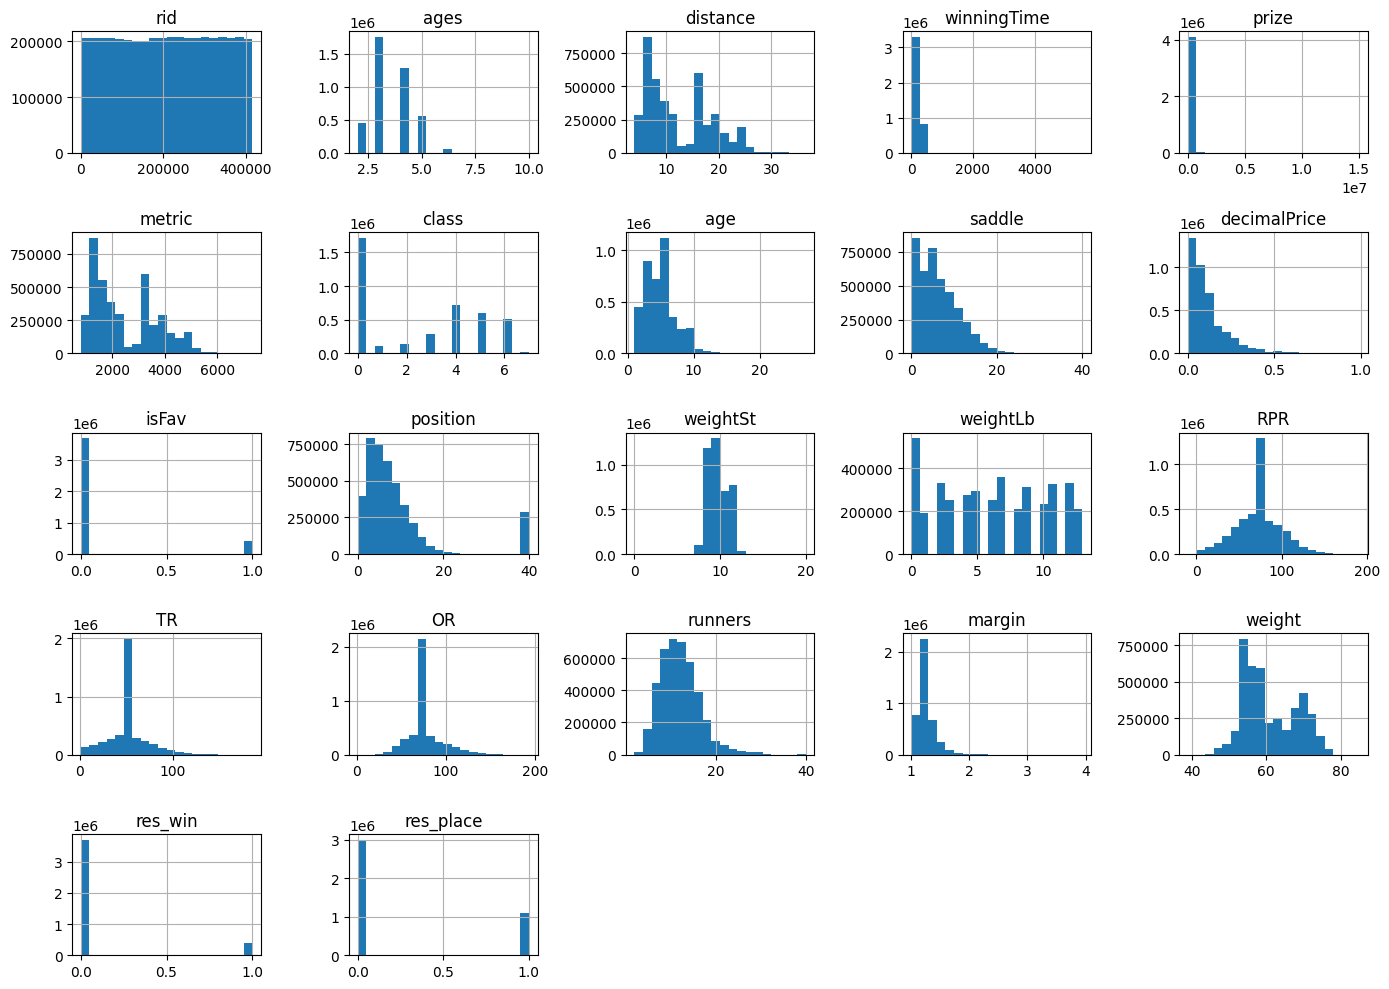

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical features
horse_races[horse_races_numerical].hist(figsize=(14, 10), bins=20)
plt.tight_layout()
plt.show()

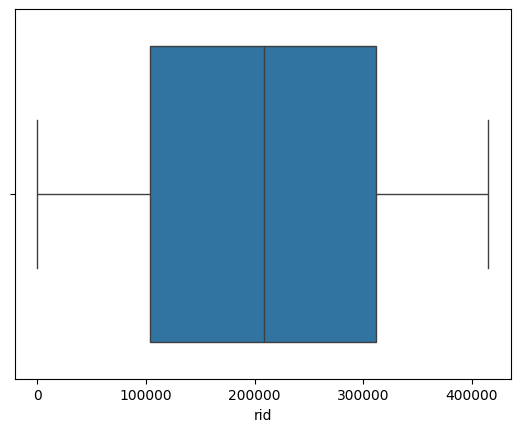

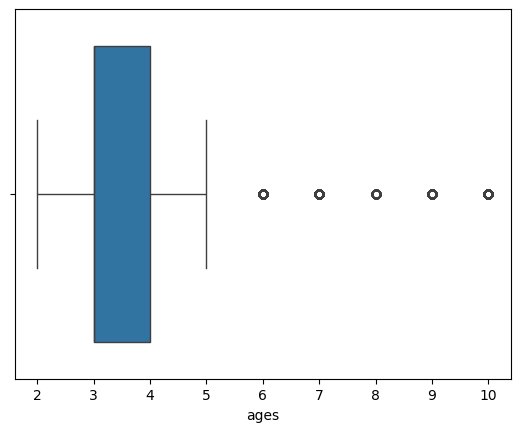

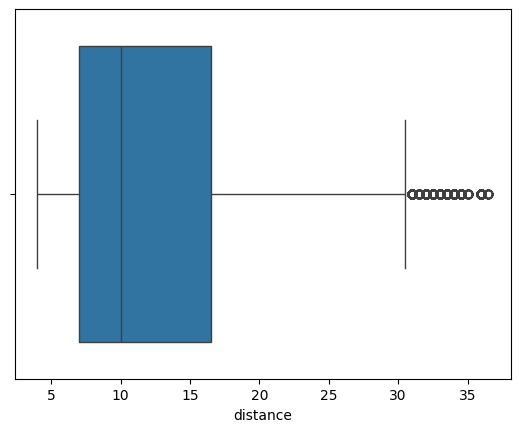

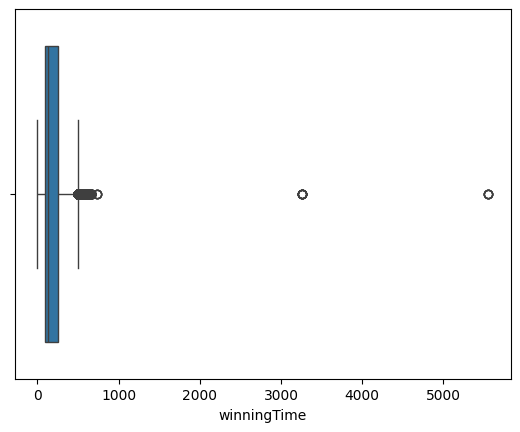

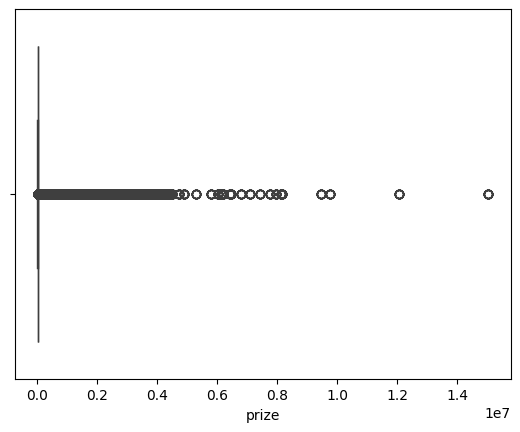

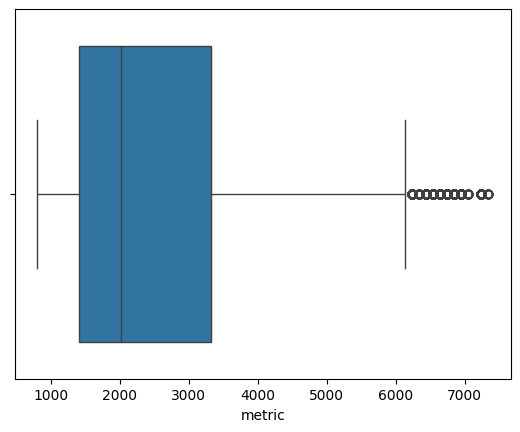

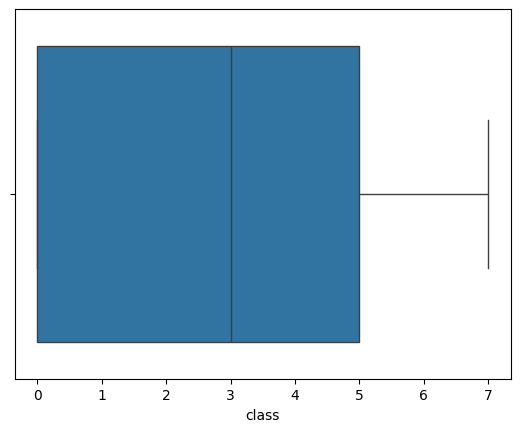

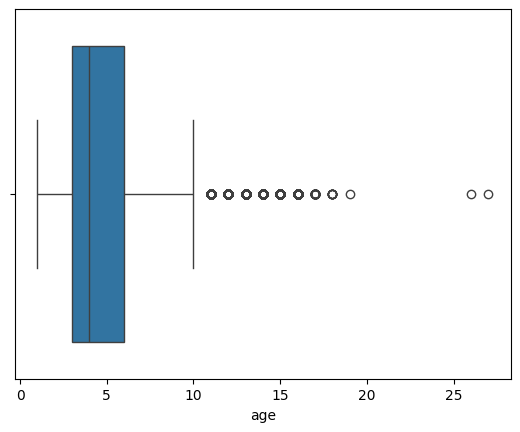

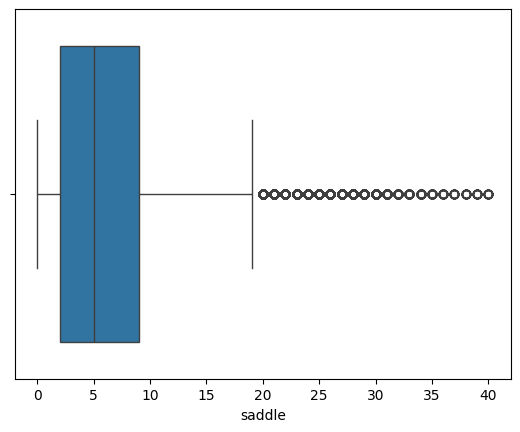

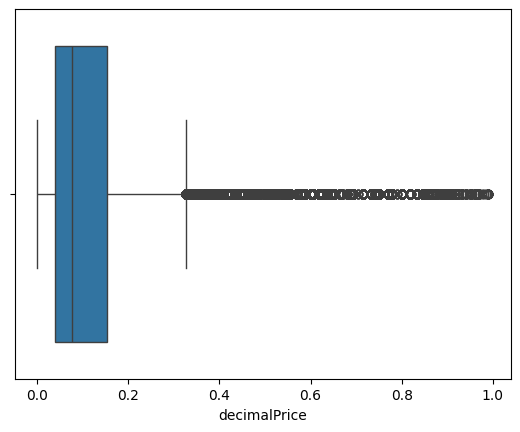

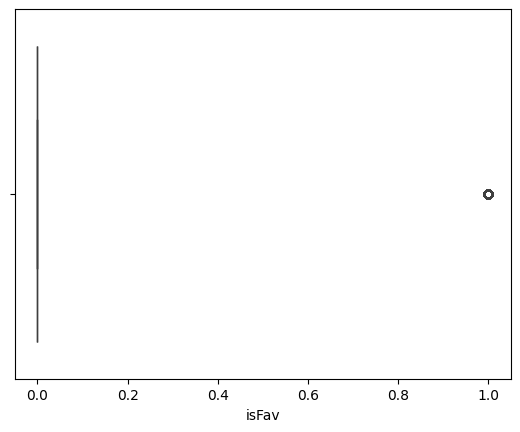

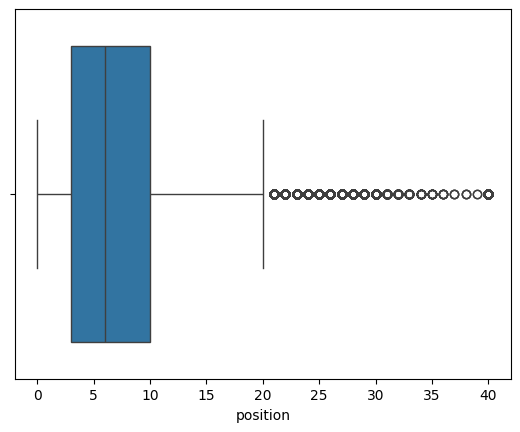

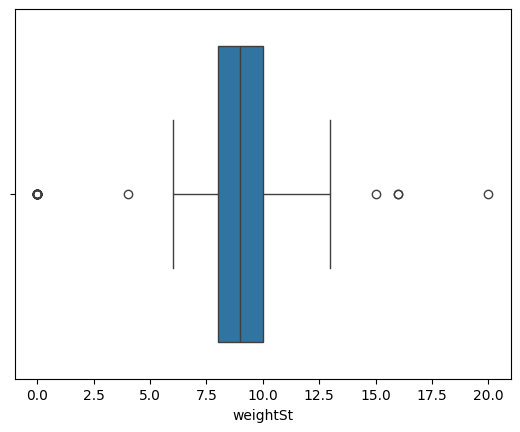

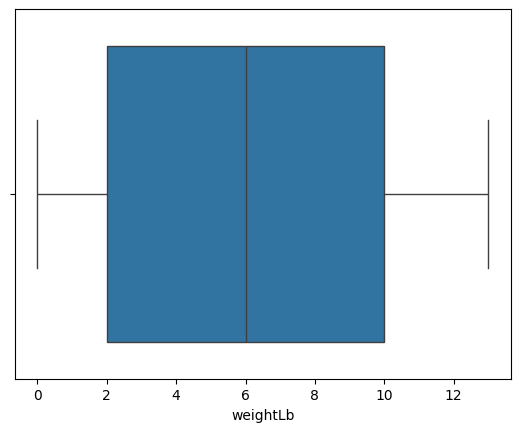

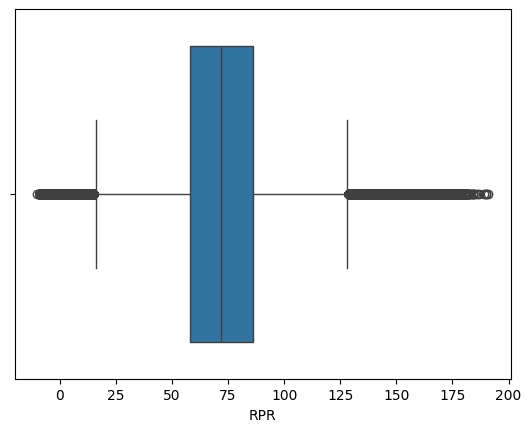

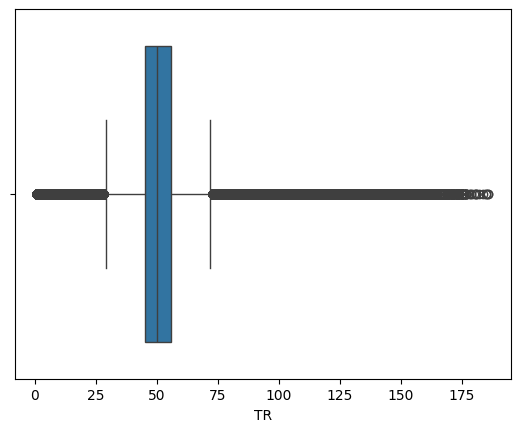

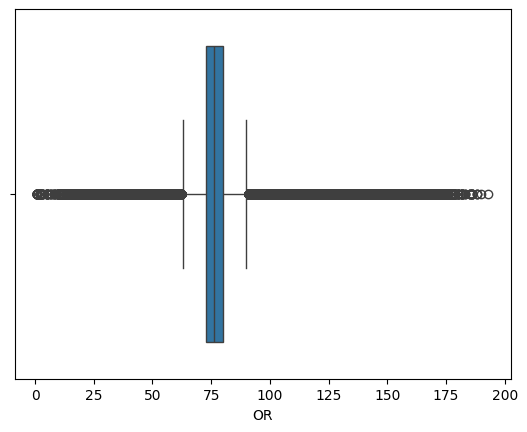

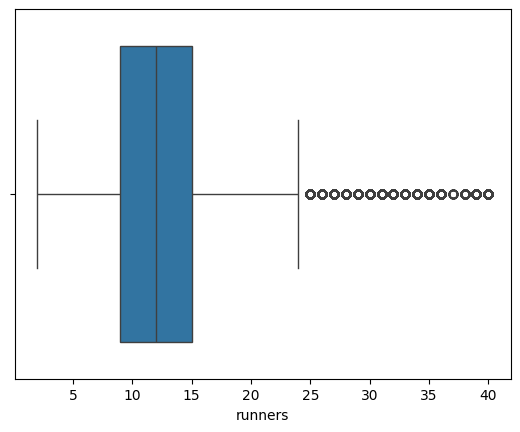

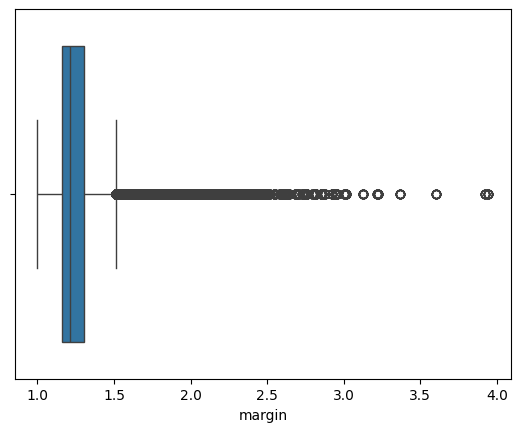

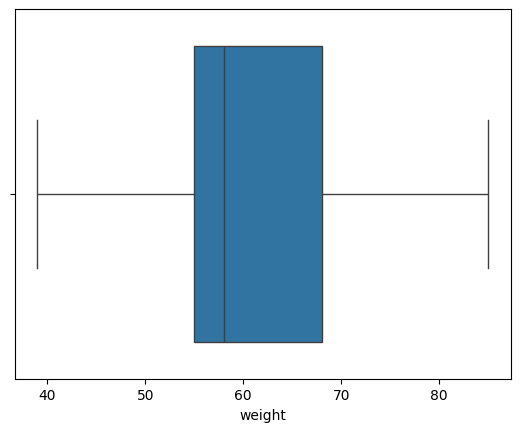

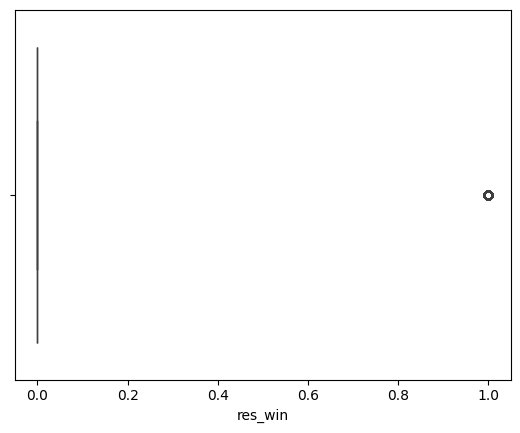

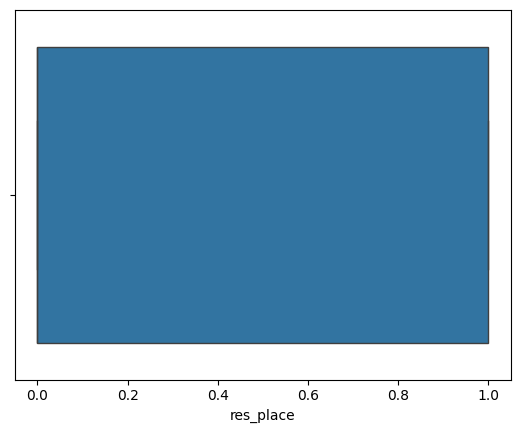

In [369]:
# Boxplot for key numerical features
for col in horse_races_numerical:
    sns.boxplot(data=horse_races[col].dropna(), orient='h')
    plt.show()

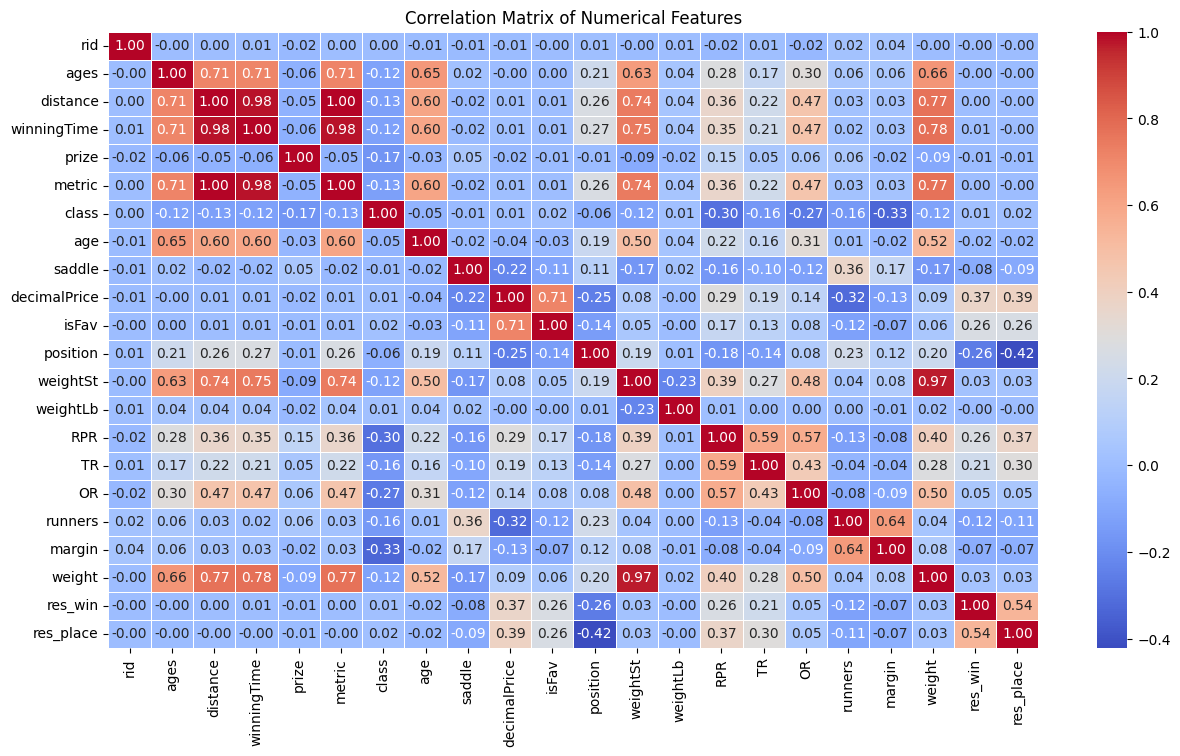

In [370]:
correlation_matrix = horse_races[horse_races_numerical].corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


From the correlation matrix we can see the features with most correaltion are:
weightSt and weight = 0.97
metric and winning time = 0.98
distance and metric = 1.00
distance and winningtime = 0.98


Hence we can drop the features weightSt, metric and distance

In [374]:
# Frequency distribution of categorical features
for col in horse_races_categorical:
    print(f"\n{col} top 5 value counts:")
    print(horse_races[col].value_counts().nlargest(5))



course top 5 value counts:
course
Wolverhampton (AW)    143514
Lingfield (AW)        124201
Southwell (AW)        103227
Kempton (AW)           79655
Doncaster              64090
Name: count, dtype: int64

time top 5 value counts:
time
02:30    106985
03:30    101157
03:00     98850
04:00     91868
02:00     88732
Name: count, dtype: int64

date top 5 value counts:
date
2002-04-01    1307
1991-04-01    1255
1999-04-05    1236
1992-04-20    1195
1990-04-16    1194
Name: count, dtype: int64

title top 5 value counts:
title
Irish Stallion Farms European Breeders Fund Fillies Maiden    5084
Maiden Plate                                                  5037
Derrinstown Stud Apprentice Handicap                          4859
Irish Stallion Farms European Breeders Fund Maiden            4314
Betway Handicap                                               4299
Name: count, dtype: int64

rclass top 5 value counts:
rclass
Class 0    1716922
Class 4     720206
Class 5     601560
Class 6     511569


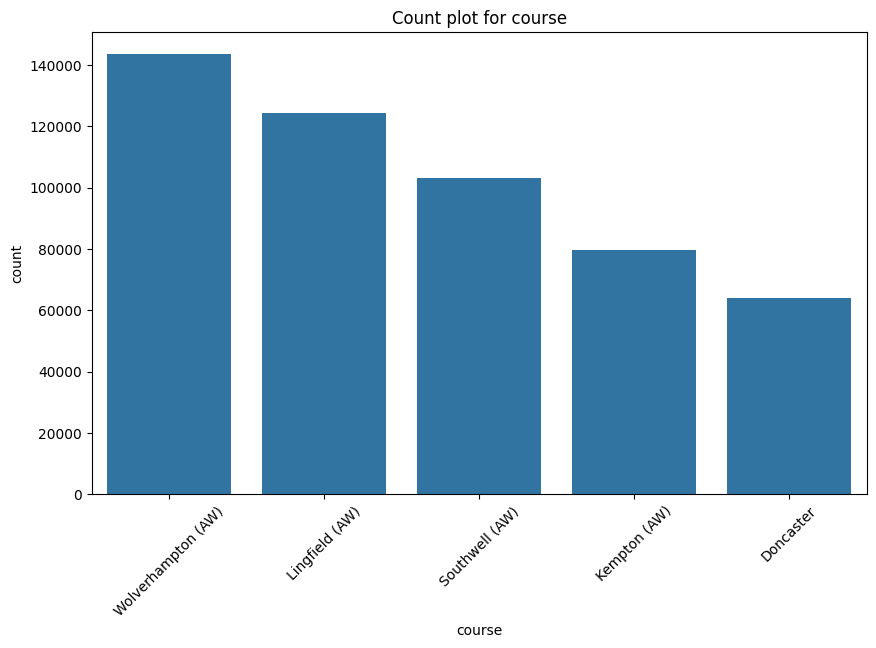

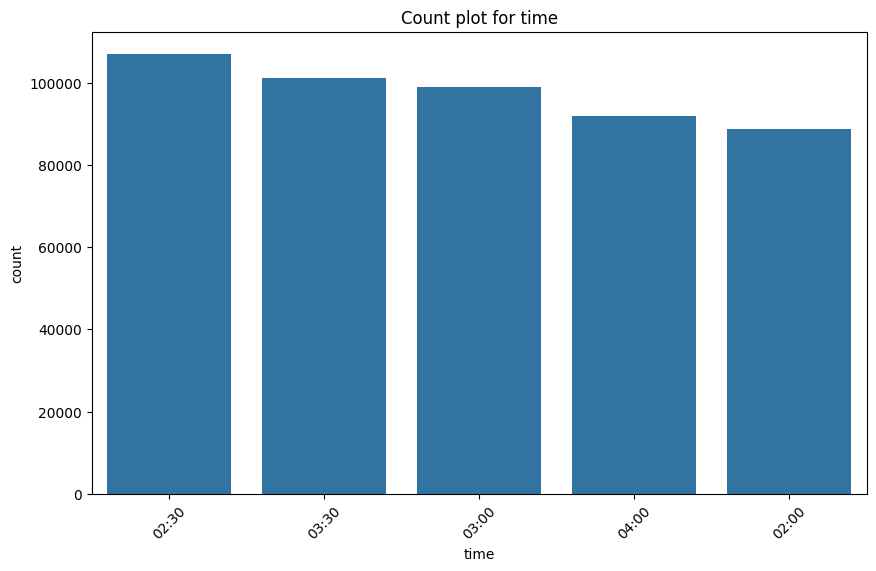

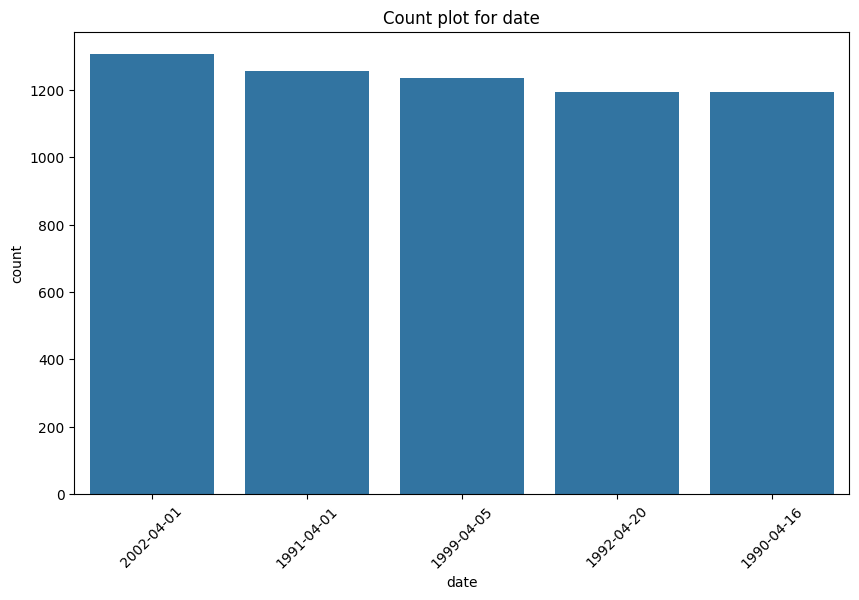

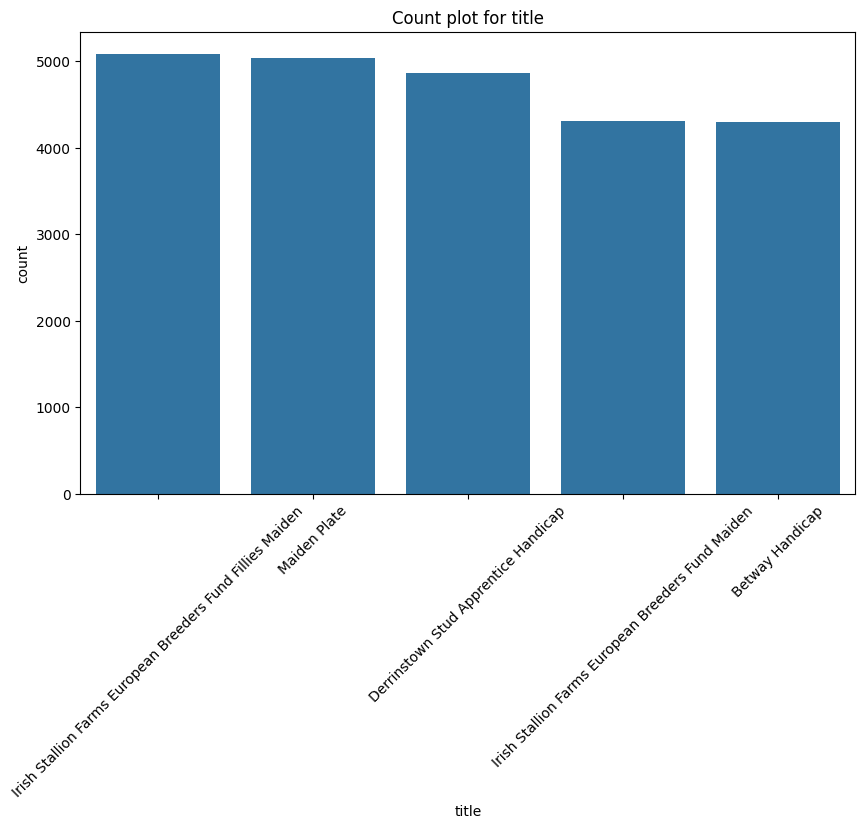

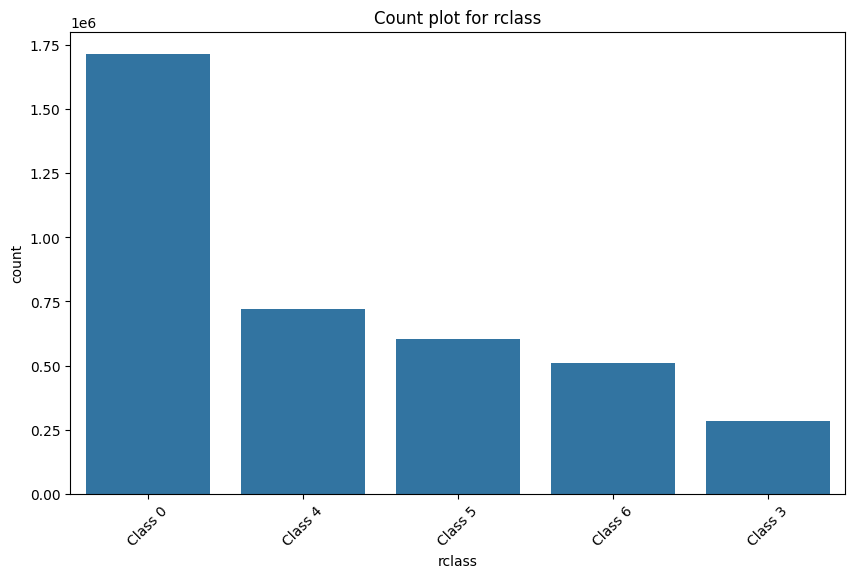

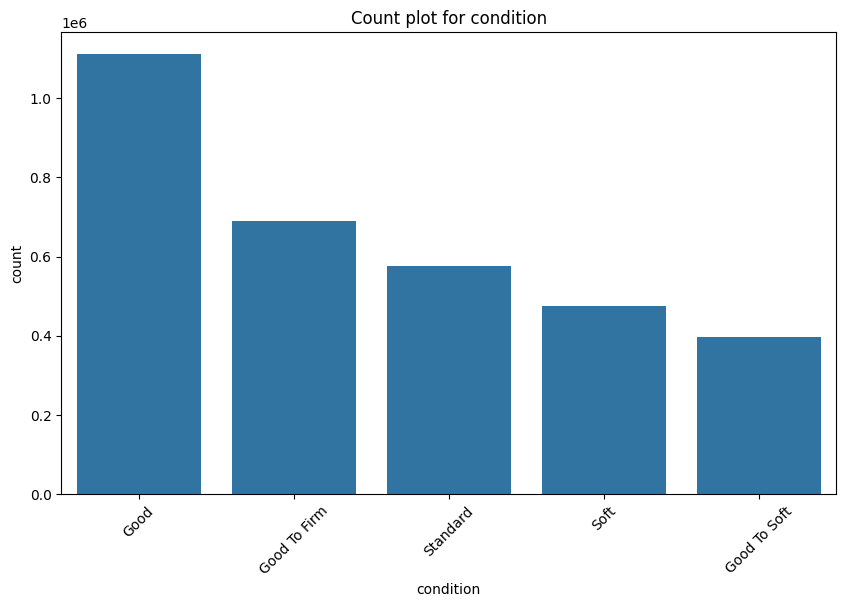

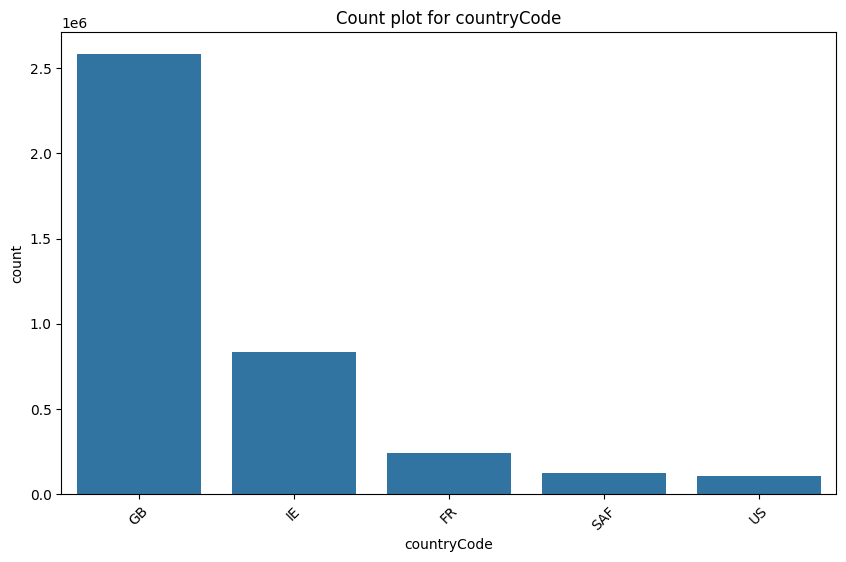

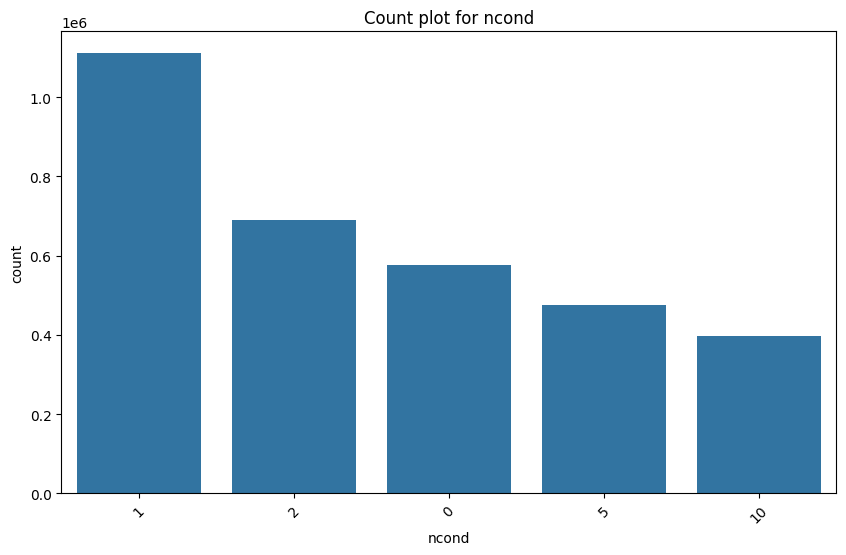

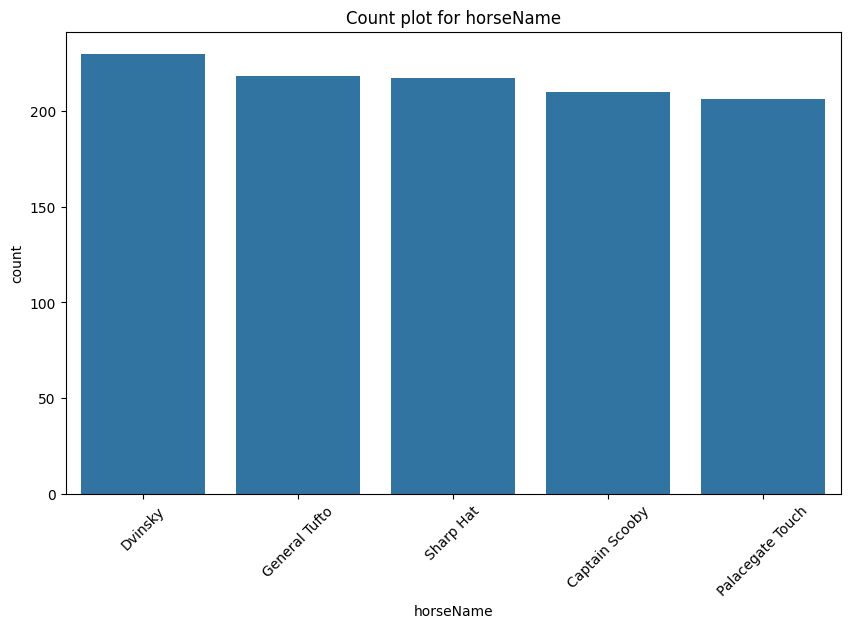

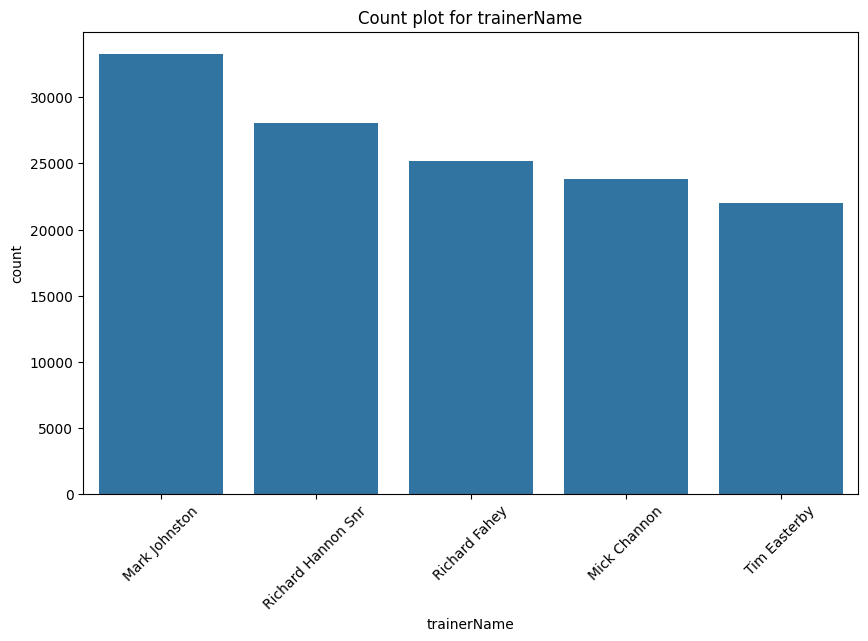

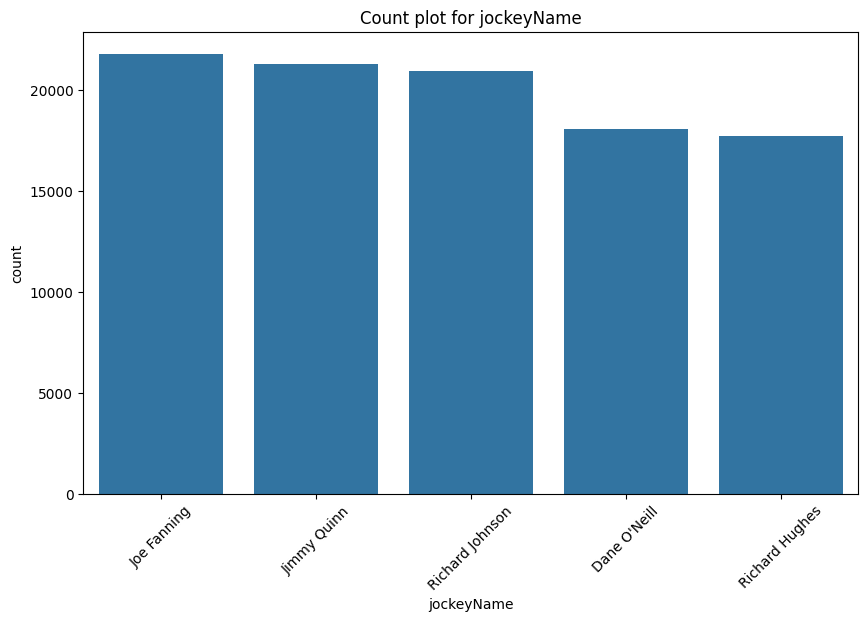

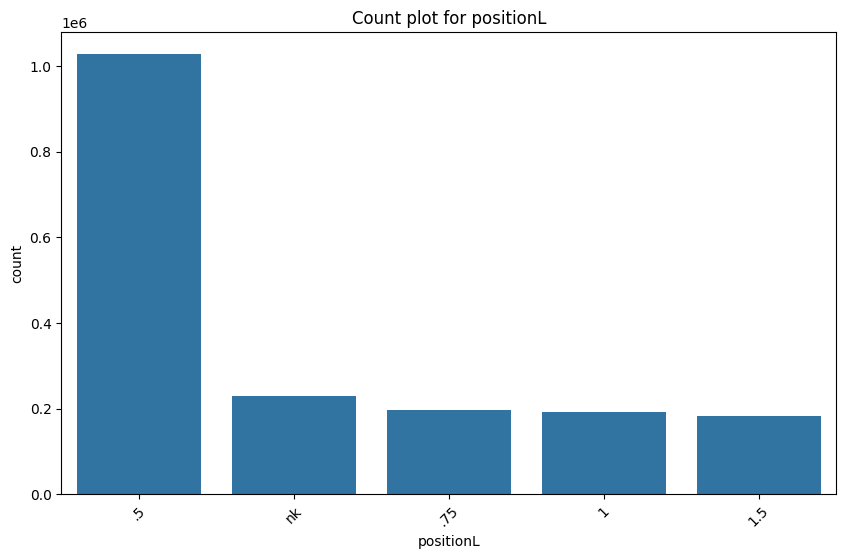

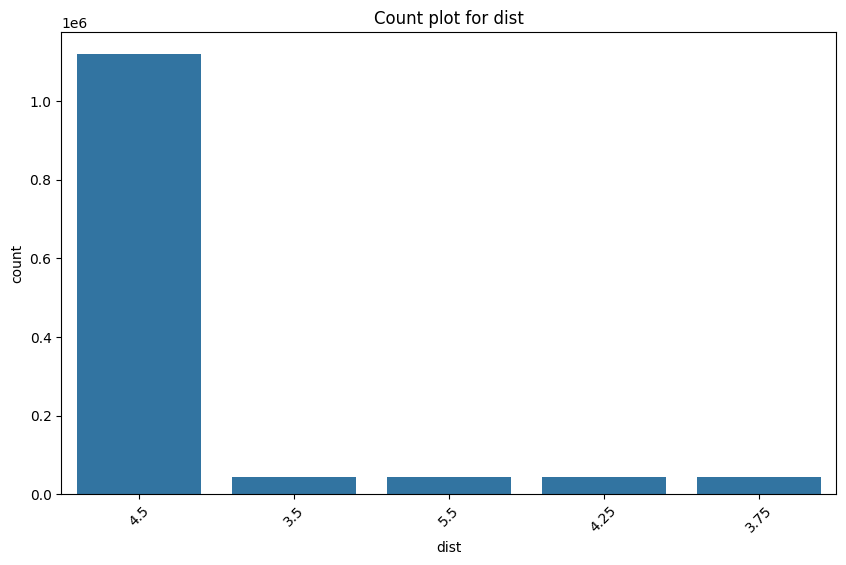

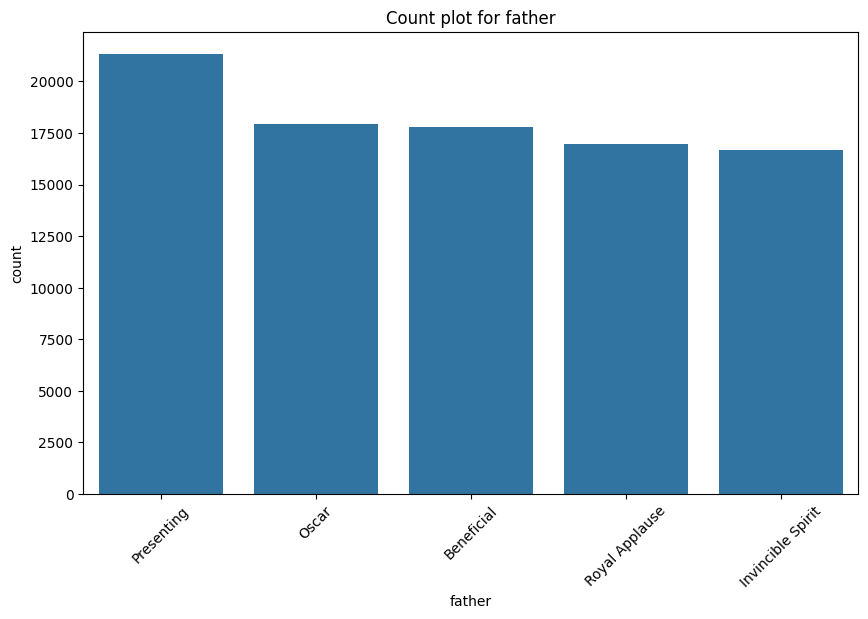

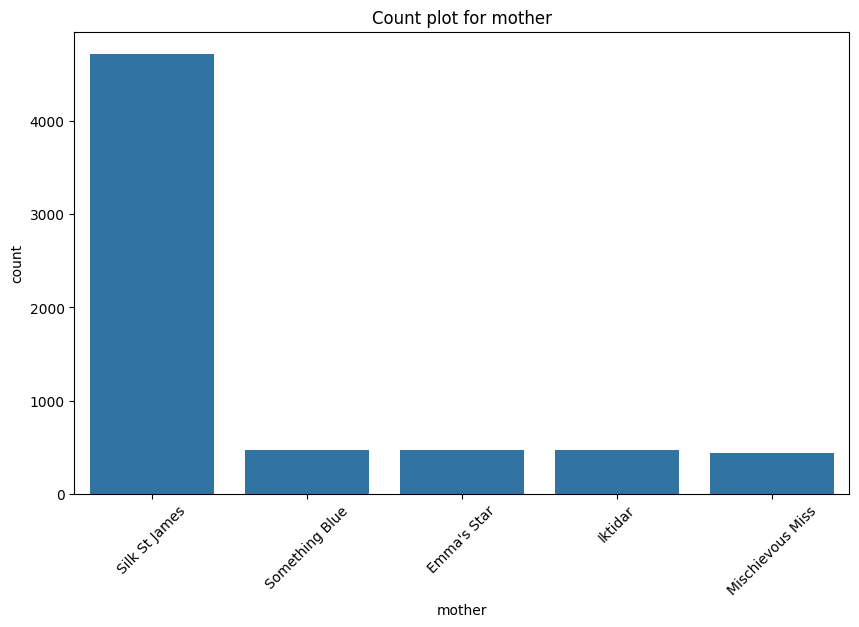

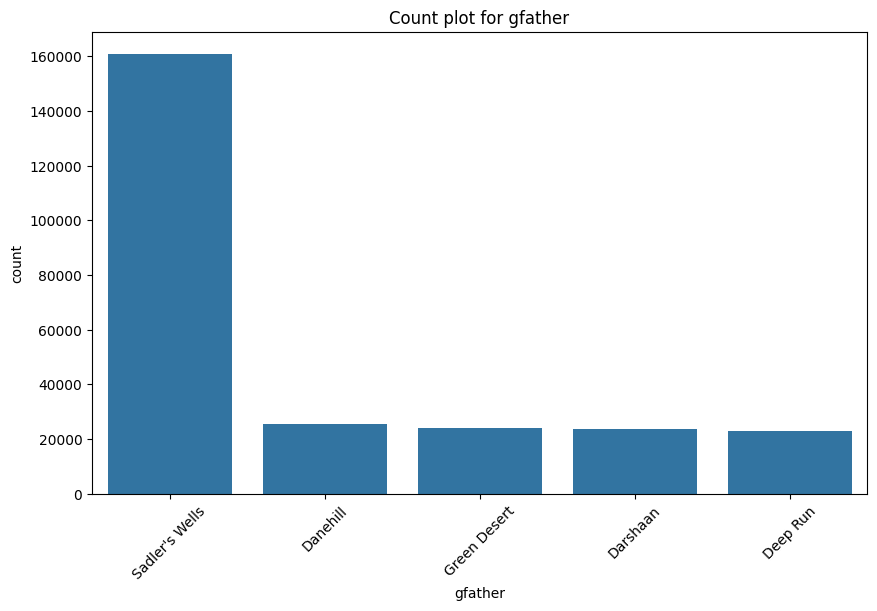

In [375]:
# Bar plots for categorical features
for col in horse_races_categorical:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=horse_races, x=col, order=horse_races[col].value_counts().nlargest(5).index)
    plt.title(f'Count plot for {col}')
    plt.xticks(rotation=45)
    plt.show()


In [376]:
# Cross-tabulation between key categorical variables
cross_tab = pd.crosstab(horse_races['course'], horse_races['rclass'])
cross_tab

rclass,Class 0,Class 1,Class 2,Class 3,Class 4,Class 5,Class 6,Class 7
course,,,,,,,,
Aintree,1426,6216,3218,3020,1554,96,305,0
Albuquerque (USA),8,0,0,0,0,0,0,0
Albury (AUS),45,0,0,0,0,0,0,0
Alice springs (AUS),9,0,0,0,0,0,0,0
Amiens (FR),64,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
Worcester,6124,34,304,3933,15374,7071,3670,0
Wyong (AUS),156,0,0,0,0,0,0,0
Yarmouth,932,367,336,1852,7758,10790,14383,268


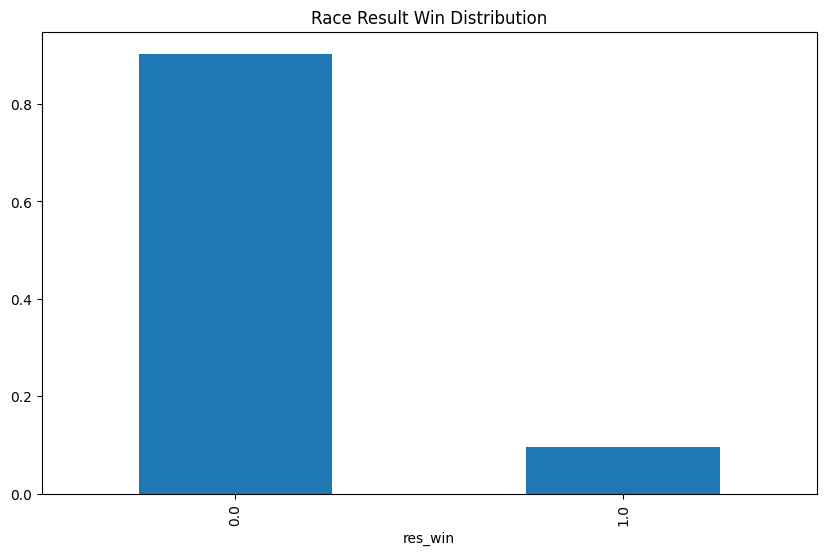

In [115]:
# Checking class distribution
horse_races['res_win'].value_counts(normalize=True).plot(kind='bar', figsize=(10, 6), title='Race Result Win Distribution')
plt.show()


### Encoding, Scaling and SMOTE for balancing

From correlation analysyis: dropping metric, weightSt and distance columns

In [118]:
horse_races.drop(columns=['weightSt', 'metric', 'distance'],axis=1,inplace=True)

In [119]:
horse_races_numerical = horse_races.select_dtypes(include=np.number).columns
horse_races_categorical = horse_races.select_dtypes(exclude=np.number).columns

In [120]:
horse_races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4106794 entries, 0 to 4106793
Data columns (total 39 columns):
 #   Column            Dtype  
---  ------            -----  
 0   rid               int64  
 1   course            object 
 2   title             object 
 3   rclass            object 
 4   ages              float64
 5   condition         object 
 6   winningTime       float64
 7   prize             float64
 8   countryCode       object 
 9   ncond             object 
 10  class             int64  
 11  year              int32  
 12  month             int32  
 13  day               int32  
 14  day_of_week       int32  
 15  is_weekend        int64  
 16  race_time_period  int64  
 17  horseName         object 
 18  age               float64
 19  saddle            float64
 20  decimalPrice      float64
 21  isFav             int64  
 22  trainerName       object 
 23  jockeyName        object 
 24  position          int64  
 25  positionL         float64
 26  dist          

In [121]:
horse_races_categorical, horse_races_numerical

(Index(['course', 'title', 'rclass', 'condition', 'countryCode', 'ncond',
        'horseName', 'trainerName', 'jockeyName', 'father', 'mother',
        'gfather'],
       dtype='object'),
 Index(['rid', 'ages', 'winningTime', 'prize', 'class', 'year', 'month', 'day',
        'day_of_week', 'is_weekend', 'race_time_period', 'age', 'saddle',
        'decimalPrice', 'isFav', 'position', 'positionL', 'dist', 'weightLb',
        'RPR', 'TR', 'OR', 'runners', 'margin', 'weight', 'res_win',
        'res_place'],
       dtype='object'))

In [123]:
type(horse_races['target'])

pandas.core.series.Series

In [124]:
target_encoding_cols = ['course', 'title', 'condition', 'countryCode', 'ncond']
type(horse_races[target_encoding_cols])

pandas.core.frame.DataFrame

In [125]:
print(horse_races[target_encoding_cols].isnull().sum())
print(horse_races['target'].isnull().sum())

course         0
title          0
condition      0
countryCode    0
ncond          0
dtype: int64
0


In [126]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler,OrdinalEncoder
import category_encoders as ce
import joblib

def preprocess_data(df):

    numerical_cols = df.select_dtypes(include=np.number).columns.drop(['rid','ages','age','class','is_weekend','race_time_period','isFav'])
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
    # Example: Ordinal Encoding for ordered categories
    ordinal_columns = ['rclass', 'ages','age']
    ordinal_encoder = OrdinalEncoder()
    df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

    high_cardinality_cols = ['horseName', 'trainerName', 'jockeyName', 'father', 'mother', 'gfather','target']
    for col in high_cardinality_cols:
        label_encoder = LabelEncoder()
        df[col] = label_encoder.fit_transform(df[col])

    # binary_encoding encoding selected columns

    # Target-based encoding for selected columns
    target_encoding_cols = ['course', 'title', 'condition', 'countryCode', 'ncond']
    target_encoder = ce.TargetEncoder(cols=target_encoding_cols)
    df[target_encoding_cols] = target_encoder.fit_transform(df[target_encoding_cols], df['target'])

    # Concatenating one-hot encoded columns with the rest of the data
    joblib.dump(target_encoder,'BinaryEncoder.joblib')
    joblib.dump(ordinal_encoder,'OrdinalEncoder.joblib')
    joblib.dump(label_encoder,'LabelEncoder.joblib')

    return df

horse_races = preprocess_data(horse_races)

In [127]:
len(horse_races.columns)

38

In [128]:
horse_races.columns

Index(['rid', 'course', 'title', 'rclass', 'ages', 'condition', 'winningTime',
       'prize', 'countryCode', 'ncond', 'class', 'year', 'month', 'day',
       'day_of_week', 'is_weekend', 'race_time_period', 'horseName', 'age',
       'saddle', 'decimalPrice', 'isFav', 'trainerName', 'jockeyName',
       'position', 'positionL', 'dist', 'weightLb', 'RPR', 'TR', 'OR',
       'father', 'mother', 'gfather', 'runners', 'margin', 'weight', 'target'],
      dtype='object')

In [129]:
horse_races['target'].value_counts()

target
0    2998871
1     712122
2     395801
Name: count, dtype: int64

In [130]:
X = horse_races.drop(columns=['target'],axis=1)
y = horse_races['target']

In [131]:
X.shape, y.shape

((4106794, 37), (4106794,))

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3285435, 37), (821359, 37), (3285435,), (821359,))

In [134]:
# from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [135]:
X_resampled.shape, y_resampled.shape

((7197516, 37), (7197516,))

In [ ]:
# X_resampled.to_csv('X_train_balanced.csv',index=False)
# y_resampled.to_csv('y_train_balanced.csv',index=False)

In [137]:
import pandas as pd

# Combine features and target for sampling
data = pd.concat([X_resampled, y_resampled], axis=1)
# Stratified sampling (10% of the data)
sampled_data = data.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Separate features and target after sampling
X_train_sampled = sampled_data.drop(columns=["target"])
y_train_sampled = sampled_data["target"]

print(f"Sampled data size: {X_train_sampled.shape, y_train_sampled.shape}")


Sampled data size: ((719751, 37), (719751,))


C:\Users\Praveen\AppData\Local\Temp\ipykernel_26112\3608642080.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [137]:
X_train_sampled.to_csv('X_train_sampled.csv',index=False)
y_train_sampled.to_csv('y_train_sampled.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_test.to_csv('y_test.csv',index=False)


### Feature Selection

In [138]:
X_train = pd.read_csv('X_train_sampled.csv')
y_train = pd.read_csv('y_train_sampled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [139]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((719751, 37), (719751, 1), (821359, 37), (821359, 1))

In [140]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

lasso = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.01,
    random_state=42
)
lasso.fit(X_train, y_train)

# Step 3: Get selected features
model = SelectFromModel(lasso, prefit=True)
X_train_selected = model.transform(X_train)
X_test_selected = model.transform(X_test)

selected_features = X_train.columns[model.get_support()]
print("Selected Features:", selected_features.tolist())
print("Number of Selected Features:", len(selected_features))

c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features: ['title', 'rclass', 'ages', 'winningTime', 'prize', 'class', 'year', 'month', 'day', 'day_of_week', 'is_weekend', 'race_time_period', 'age', 'decimalPrice', 'isFav', 'trainerName', 'jockeyName', 'position', 'positionL', 'dist', 'RPR', 'TR', 'OR', 'father', 'gfather', 'runners', 'margin', 'weight']
Number of Selected Features: 28


In [142]:
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

X_train_reduced.shape, X_test_reduced.shape

((719751, 28), (821359, 28))

In [143]:
X_train_reduced.to_csv('X_train_reduced.csv',index=False)
X_test_reduced.to_csv('X_test_reduced.csv',index=False)

In [137]:
# X_reduced.to_csv('X_reduced.csv',index=False)

### Model Building

In [154]:
# X = pd.read_csv('X_reduced.csv')
# y = y

In [3]:
X_train = pd.read_csv('X_train_reduced.csv')
y_train = pd.read_csv('y_train_sampled.csv')
X_test = pd.read_csv('X_test_reduced.csv')
y_test = pd.read_csv('y_test.csv')

In [143]:
# X_train = pd.read_csv('X_train_sampled.csv')
# y_train = pd.read_csv('y_train_sampled.csv')
# X_test = pd.read_csv('X_test.csv')
# y_test = pd.read_csv('y_test.csv')

In [144]:
y_train.shape, y_test.shape

((719751, 1), (821359, 1))

In [145]:
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [146]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((719751, 37), (719751,), (821359, 37), (821359,))

In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def model_validation_classification(xtrain, ytrain, xtest, ytest, model_list):
    best_model = None
    best_metrics = None
    best_score = -float('inf')  # To track the best model based on F1-score
    model_results = {}
    
    for model in model_list:
        model.fit(xtrain, ytrain)
        
        # Predictions on training data
        train_pred = model.predict(xtrain)
        train_proba = model.predict_proba(xtrain) if hasattr(model, "predict_proba") else None
        train_accuracy = accuracy_score(ytrain, train_pred)
        train_precision = precision_score(ytrain, train_pred, average='weighted')
        train_recall = recall_score(ytrain, train_pred, average='weighted')
        train_f1 = f1_score(ytrain, train_pred, average='weighted')
        train_roc_auc = (
            roc_auc_score(ytrain, train_proba, average='weighted', multi_class='ovr') 
            if train_proba is not None 
            else None
        )
        
        # Predictions on test data
        test_pred = model.predict(xtest)
        test_proba = model.predict_proba(xtest) if hasattr(model, "predict_proba") else None
        test_accuracy = accuracy_score(ytest, test_pred)
        test_precision = precision_score(ytest, test_pred, average='weighted')
        test_recall = recall_score(ytest, test_pred, average='weighted')
        test_f1 = f1_score(ytest, test_pred, average='weighted')
        test_roc_auc = (
            roc_auc_score(ytest, test_proba, average='weighted', multi_class='ovr') 
            if test_proba is not None 
            else None
        )
        
        # Store metrics for this model
        metrics = {
            'train_scores': {
                'Accuracy': train_accuracy,
                'Precision': train_precision,
                'Recall': train_recall,
                'F1-Score': train_f1,
                'ROC-AUC': train_roc_auc
            },
            'test_scores': {
                'Accuracy': test_accuracy,
                'Precision': test_precision,
                'Recall': test_recall,
                'F1-Score': test_f1,
                'ROC-AUC': test_roc_auc
            }
        }
        
        model_results[model] = metrics
        
        # Select best model based on test F1-Score
        if test_f1 > best_score:
            best_score = test_f1
            best_model = model
            best_metrics = metrics
    
    print("\nAll Model Metrics:")
    for mod, mets in model_results.items():
        print(f"\nModel: {mod}")
        print("Training Scores:", mets['train_scores'])
        print("Testing Scores:", mets['test_scores'])
    
    return best_model, best_metrics


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

model_list = [
    LogisticRegression(max_iter=1000, random_state=42),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
]

best_model, best_metrics = model_validation_classification(X_train, y_train, X_test, y_test, model_list)

print("\nBest Model:", best_model)
print("\nBest Model Metrics:", best_metrics)


Metrices after using all the Features -->

All Model Metrics:

Model: LogisticRegression(max_iter=1000, random_state=42)
Training Scores: {'Accuracy': 0.6212718009422703, 'Precision': 0.6212032014657226, 'Recall': 0.6212718009422703, 'F1-Score': 0.6211305503578102, 'ROC-AUC': 0.8021954744336253}
Testing Scores: {'Accuracy': 0.6732074525268488, 'Precision': 0.7535667299096948, 'Recall': 0.6732074525268488, 'F1-Score': 0.7019104134427008, 'ROC-AUC': 0.834002373635141}

Model: RandomForestClassifier(random_state=42)
Training Scores: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}
Testing Scores: {'Accuracy': 0.9996152717630171, 'Precision': 0.9996153795804881, 'Recall': 0.9996152717630171, 'F1-Score': 0.9996153102468591, 'ROC-AUC': 0.9999786738476785}

Best Model: RandomForestClassifier(random_state=42)

Best Model Metrics: {'train_scores': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}, 'test_scores': {'Accuracy': 0.9996152717630171, 'Precision': 0.9996153795804881, 'Recall': 0.9996152717630171, 'F1-Score': 0.9996153102468591, 'ROC-AUC': 0.9999786738476785}}

Model: DecisionTreeClassifier(random_state=42)
Training Scores: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}
Testing Scores: {'Accuracy': 0.9999683451450584, 'Precision': 0.9999683502238119, 'Recall': 0.9999683451450584, 'F1-Score': 0.9999683461616016, 'ROC-AUC': 0.999979332589699}

Model: GradientBoostingClassifier(random_state=42)
Training Scores: {'Accuracy': 0.9999513720717303, 'Precision': 0.9999513791647218, 'Recall': 0.9999513720717303, 'F1-Score': 0.9999513720714716, 'ROC-AUC': 0.9999999866603351}
Testing Scores: {'Accuracy': 0.9998429432197127, 'Precision': 0.999843078280521, 'Recall': 0.9998429432197127, 'F1-Score': 0.9998429694756604, 'ROC-AUC': 0.9999997409731407}

Metrices after using the Selected features using Lasso--> 

All Model Metrics:

Model: LogisticRegression(max_iter=1000, random_state=42)
Training Scores: {'Accuracy': 0.7047701218893756, 'Precision': 0.709463696126205, 'Recall': 0.7047701218893756, 'F1-Score': 0.7067959467516104, 'ROC-AUC': 0.8686976865168833}
Testing Scores: {'Accuracy': 0.7492972013455749, 'Precision': 0.7992120380689155, 'Recall': 0.7492972013455749, 'F1-Score': 0.7679686548525231, 'ROC-AUC': 0.8982274134251623}

Model: RandomForestClassifier(random_state=42)
Training Scores: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}
Testing Scores: {'Accuracy': 0.9997881559707753, 'Precision': 0.9997882528282939, 'Recall': 0.9997881559707753, 'F1-Score': 0.9997881820403974, 'ROC-AUC': 0.999979219190948}

Model: DecisionTreeClassifier(random_state=42)
Training Scores: {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1-Score': 1.0, 'ROC-AUC': 1.0}
Testing Scores: {'Accuracy': 0.9999281678291709, 'Precision': 0.9999281750473914, 'Recall': 0.9999281678291709, 'F1-Score': 0.9999281700398375, 'ROC-AUC': 0.9999292020815916}

Model: GradientBoostingClassifier(random_state=42)
Training Scores: {'Accuracy': 0.9999513720717303, 'Precision': 0.9999513791647218, 'Recall': 0.9999513720717303, 'F1-Score': 0.9999513720714716, 'ROC-AUC': 0.9999999866603351}
Testing Scores: {'Accuracy': 0.9998429432197127, 'Precision': 0.999843078280521, 'Recall': 0.9998429432197127, 'F1-Score': 0.9998429694756604, 'ROC-AUC': 0.9999997409731407}

Best Model: GradientBoostingClassifier(random_state=42)

Best Model Metrics: {'train_scores': {'Accuracy': 0.9999513720717303, 'Precision': 0.9999513791647218, 'Recall': 0.9999513720717303, 'F1-Score': 0.9999513720714716, 'ROC-AUC': 0.9999999866603351}, 'test_scores': {'Accuracy': 0.9998429432197127, 'Precision': 0.999843078280521, 'Recall': 0.9998429432197127, 'F1-Score': 0.9998429694756604, 'ROC-AUC': 0.9999997409731407}}

In [ ]:
y_pred = best_model.predict(X_test)

In [9]:
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [10]:
final

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
821354,0,0
821355,1,1
821356,1,1
821357,0,0


#### Tuning GradientBoosting Classifier

In [47]:
X_train = pd.read_csv('X_train_sampled.csv')
y_train = pd.read_csv('y_train_sampled.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [48]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((719751, 37), (719751, 1), (821359, 37), (821359, 1))

In [49]:
y_train

,target
0,0
1,0
2,0
3,0
4,0
...,...
719746,2
719747,2
719748,2
719749,2


In [50]:
import pandas as pd

# Combine features and target for sampling
data = pd.concat([X_train, y_train], axis=1)
# Stratified sampling (10% of the data)
sampled_data = data.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))

# Separate features and target after sampling
X_train_sampled = sampled_data.drop(columns=["target"])
y_train_sampled = sampled_data["target"]

print(f"Sampled data size: {X_train_sampled.shape, y_train_sampled.shape}")

Sampled data size: ((71976, 37), (71976,))


C:\Users\Praveen\AppData\Local\Temp\ipykernel_29380\2391892493.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_data = data.groupby("target", group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42))


In [51]:
y_train_sampled = y_train_sampled.values.ravel()
y_test = y_test.values.ravel()

In [52]:
X_train_sampled.shape, y_train_sampled.shape, X_test.shape, y_test.shape

((71976, 37), (71976,), (821359, 37), (821359,))

In [46]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.metrics import classification_report, roc_auc_score

# # Define the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300, 500],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 5, 7, 9],
#     'min_samples_split': [2, 10, 50, 100],
#     'min_samples_leaf': [1, 10, 50, 100],
#     # 'subsample': [0.6, 0.8, 1.0],                 
#     # 'max_features': ['sqrt', 'log2', None]
# }

# # Initialize the Gradient Boosting model
# gbc = GradientBoostingClassifier(random_state=42)

# # Randomized Search for hyperparameter tuning
# random_search = RandomizedSearchCV(
#     estimator=gbc,
#     param_distributions=param_grid,
#     scoring='roc_auc',
#     # n_iter=50, 
#     cv=3, 
#     verbose=2,
#     random_state=42,
#     n_jobs=-1
# )

# # Fit the model with randomized search
# random_search.fit(X_train_sampled, y_train_sampled)
# # random_search.fit(X_train, y_train)

# # Best parameters and performance
# print("Best Parameters:", random_search.best_params_)
# print("Best ROC-AUC Score (Cross-Validation):", random_search.best_score_)

# # Train the model with the best parameters on the full training set
# best_model = random_search.best_estimator_

# # Evaluate on the test set
# y_pred = best_model.predict(X_test)
# y_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Test ROC-AUC Score:", roc_auc_score(y_test, y_proba))

In [44]:
print("Unique classes in y_train:", set(y_train_sampled))
print("Unique classes in y_test:", set(y_test))

Unique classes in y_train: {0, 1, 2}
Unique classes in y_test: {0, 1, 2}


In [274]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Prepare the LightGBM dataset
lgb_train = lgb.Dataset(X_train_sampled, label=y_train_sampled)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train)

# Define hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 500, 1000],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 5, 7, 9],
#     'num_leaves': [31, 50, 70],
#     'min_child_samples': [10, 20, 50, 100],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'device' : ['gpu']
# }

# Train LightGBM
params = {
    'objective': 'multiclass',
    'num_class': len(set(y_train_sampled)),
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'max_depth': -1,
    'n_estimators': 200,
    'random_state': 42
}

# LightGBM model
lgbm = lgb.LGBMClassifier(boosting_type='gbdt', random_state=42)

lgb_model = lgb.train(params, lgb_train, valid_sets=[lgb_test])

# Predictions
y_pred_probs = lgb_model.predict(X_test)  # Probabilities for each class
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class predictions

# Evaluation
print(classification_report(y_test, y_pred))

c:\Users\Praveen\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightgbm\engine.py:204: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072733 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8417
[LightGBM] [Info] Number of data points in the train set: 719751, number of used features: 37
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    599699
           1       1.00      1.00      1.00    142443
           2       1.00      1.00      1.00     79217

    accuracy                           1.00    821359
   macro avg       1.00      1.00      1.00    821359
weighted avg       1.00      1.00      1.00    821359



In [275]:
joblib.dump(lgb_model,'best_lgb_model.joblib')

['best_lgb_model.joblib']